<a href="https://colab.research.google.com/github/alandesson/FinalProjectCodenation/blob/master/B3_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:

O mercado financeiro brasileiro é complexo e possui fatores influenciam o comportamento dos preços das ações. Entre esses fatores, temos o mecanismo de aluguel de ações. Esse mecanismo possui uma taxa, também conhecida como *loan fee* ou *borrow fee*, é a taxa paga pelos investidores que tomam ações emprestadas para realizar operações de venda a descoberto. Esse fenômeno é frequentemente utilizado como uma estratégia de investimento, permitindo aos investidores lucrar com a queda dos preços das ações.

No entanto, a relação entre a taxa de aluguel de ações e o preço das ações no dia é uma informação que não costuma ser divulgada amplamente. Portanto, este MVP para materia de engenharia de dados busca analisar a correlação entre a taxa de aluguel de ações e o valor das ações no dia, para investigar padrões e tendências que possam auxiliar na tomada de decisões.

Assim pretendo responder as seguintes questões:

1.   Qual o valor mínimo, máximo das ações da bolsa no dia?
2.   Qual o volume de ações vendidas?
3.   Qual a taxa de alugel da ação no dia?
4.   Taxas altas de alugel implicam em uma queda no valor da ação?
5.   Taxas baixas de alugel implicam em um aumento no valor da ação?








# Coleta de Dados:

Para obter os dados de valor da ações por dia utilizei a biblioteca do python yfinance, ela é uma biblioteca opensource que utiliza a api de finanças do yahoo para obter seus dados.

A seguir temos um exemplo de como utilizar a biblioteca para extrair os dados do ano de 2023 para ações da Petrobras:

In [16]:
import pandas as pd
import yfinance as yf
import numpy as np

ticker = "PETR4.SA"
start_date = "2023-01-01"
end_date = "2023-12-31"

stock_data = yf.download(ticker, start=start_date, end=end_date)

min_price = stock_data['Low'].min()
avg_price = stock_data['Close'].mean()
max_price = stock_data['High'].max()

total_volume = stock_data['Volume'].sum()

# Print the results
print(f"\nValor mínimo das ações: R${min_price:.2f}")
print(f"Valor final das ações: R${avg_price:.2f}")
print(f"Valor máximo das ações: R${max_price:.2f}")
print(f"Volume total de ações vendidas: {total_volume}")

[*********************100%%**********************]  1 of 1 completed


Valor mínimo das ações: R$21.83
Valor final das ações: R$29.69
Valor máximo das ações: R$38.86
Volume total de ações vendidas: 14176715400


Agora que temos como obter os dados de negociação podemos montar uma tabela de dimesão para armazena-las. No entanto, primeiro precisamos definir quais empresas vão constar na nossa base, para saber quais negociações devemos buscar.

In [19]:
pip install investpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 26.4 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481568 sha256=67b629a4541f28d48ac054e7c82ecc3bdda753f1792cdc41d5bf80b7106df3f8
  Stored in directory: /root/.cache/pip/wheels/db/f4/ae/980b93b0257620bc8e4afc98a854a7a746a33eb8335fd07906
Successfully built investpy


In [20]:
import investpy
import pandas as pd
import yfinance as yf

# Função para obter todos os tickers da bolsa brasileira (B3)
def getTodosTickersBrasileiros():
    stocks = investpy.stocks.get_stocks(country='brazil')
    tickers = stocks['symbol'].tolist()
    return tickers


tickers = getTodosTickersBrasileiros()
print(tickers)
#['ABCB4', 'AGRO3', 'RAIL3', 'ALPA3', 'ALPA4', 'ALSO3', 'AMAR3', 'ABEV3', 'ADHM3', 'ARZZ3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBRK3', 'BEEF3', 'BPHA3', 'BPAN4', 'BRAP3', 'BRAP4', 'BRFS3', 'APER3', 'BRKM3', 'BRKM5', 'BRML3', 'BRPR3', 'BRSR6', 'OIBR3', 'OIBR4', 'BTOW3', 'B3SA3', 'CAMB4', 'CARD3', 'CCPR3', 'CCRO3', 'CEDO4', 'CEED3', 'CESP6', 'CGAS5', 'CGRA4', 'CIEL3', 'CMIG3', 'CMIG4', 'COCE5', 'CPFE3', 'CPLE3', 'CPLE6', 'CRDE3', 'CSAN3', 'CSMG3', 'CSNA3', 'LIQO3', 'CTNM4', 'CYRE3', 'DASA3', 'DIRR3', 'DTEX3', 'ECOR3', 'EEEL3', 'ELEK4', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENGI4', 'EQTL3', 'YDUQ3', 'ETER3', 'EUCA4', 'EVEN3', 'EZTC3', 'FESA4', 'FHER3', 'TASA4', 'FLRY3', 'FRIO3', 'TIET3', 'TIET4', 'GFSA3', 'GGBR3', 'GGBR4', 'GOAU3', 'GOAU4', 'GOLL4', 'GRND3', 'GSHP3', 'HBOR3', 'HGTX3', 'PRIO3', 'HYPE3', 'IDNT3', 'IDVL4', 'IGTA3', 'MEAL3', 'INEP3', 'INEP4', 'ITSA3', 'ITSA4', 'ITUB3', 'ITUB4', 'JBSS3', 'JFEN3', 'JHSF3', 'JSLG3', 'KEPL3', 'KLBN4', 'LAME3', 'LAME4', 'LEVE3', 'LIGT3', 'LLIS3', 'LOGN3', 'LPSB3', 'LREN3', 'LUPA3', 'MDIA3', 'MGEL4', 'MGLU3', 'MILS3', 'MMXM3', 'ENEV3', 'MRFG3', 'MRVE3', 'MTIG4', 'MULT3', 'MYPK3', 'NATU3', 'ODPV3', 'OSXB3', 'PCAR4', 'PDGR3', 'PETR3', 'PETR4', 'PFRM3', 'PINE4', 'PLAS3', 'PMAM3', 'POMO3', 'POMO4', 'POSI3', 'PSSA3', 'PTBL3', 'PTNT4', 'ENAT3', 'QUAL3', 'RAPT3', 'RAPT4', 'RDNI3', 'RENT3', 'FRTA3', 'RNEW11', 'ROMI3', 'RSID3', 'SANB11', 'SBSP3', 'SCAR3', 'SGPS3', 'SHOW3', 'SLCE3', 'SLED4', 'SMTO3', 'SULA11', 'EGIE3', 'TCSA3', 'TECN3', 'TEKA4', 'TGMA3', 'TIMP3', 'TOTS3', 'TPIS3', 'TRIS3', 'TAEE11', 'TRPL4', 'TRPN3', 'UGPA3', 'UNIP3', 'UNIP6', 'USIM3', 'USIM5', 'TESA3', 'VALE3', 'VIVR3', 'VIVT3', 'VIVT4', 'VLID3', 'WEGE3', 'BRSR5', 'CESP5', 'ELPL3', 'SANB4', 'STBP3', 'CCXC3', 'CESP3', 'CGRA3', 'CLSC4', 'COCE3', 'TASA3', 'COGN3', 'LCAM3', 'RADL3', 'UCAS3', 'ALUP11', 'ANIM3', 'BBSE3', 'BSEV3', 'CPRE3', 'CVCB3', 'LINX3', 'SEER3', 'SMLS3', 'TUPY3', 'SQIA3', 'BIOM3', 'KLBN11', 'NUTR3', 'BAZA3', 'HGBS11', 'HGPO11', 'MBRF11', 'TCNO3', 'ABCP11', 'RBED11', 'BBPO11', 'BBRC11', 'BBVJ11', 'BPFF11', 'BRCR11', 'CTXT11', 'CXTL11', 'EURO11', 'RCRB11', 'FIGS11', 'FIXX11', 'FLMA11', 'FPAB11', 'HMOC11', 'HGCR11', 'HGLG11', 'HGRE11', 'JSRE11', 'KNCR11', 'KNRE11', 'KNRI11', 'MXRF11', 'ONEF11', 'PQDP11', 'PRSV11', 'RBBV11', 'RBCB11', 'RBGS11', 'RBRD11', 'RBVO11', 'RDES11', 'RNDP11', 'RNGO11', 'SAAG11', 'SDIL11', 'SHPH11', 'SPTW11', 'TBOF11', 'TRXL11', 'VLOL11', 'VRTA11', 'XPCM11', 'XTED11', 'SANB3', 'SEDU3', 'FRAS3', 'GEPA4', 'OFSA3', 'RLOG3', 'TOYB3', 'AAPL34', 'ABTT34', 'AMGN34', 'AMZO34', 'ARMT34', 'ATTB34', 'AXPB34', 'BERK34', 'BOAC34', 'CATP34', 'CMCS34', 'COCA34', 'CSCO34', 'DISB34', 'EXXO34', 'FDMO34', 'GEOO34', 'GSGI34', 'HALI34', 'HOME34', 'HPQB34', 'ITLC34', 'JNJB34', 'JPMC34', 'LMTB34', 'MMMC34', 'MRCK34', 'MSCD34', 'MSFT34', 'NIKE34', 'ORCL34', 'PFIZ34', 'PGCO34', 'SBUB34', 'VERZ34', 'VISA34', 'WALM34', 'WFCO34', 'WIZS3', 'BOEI34', 'CHVX34', 'COPH34', 'CTGP34', 'FBOK34', 'IBMB34', 'LILY34', 'MCDC34', 'MFII11', 'MSBR34', 'NFLX34', 'PEPB34', 'SLBG34', 'UPSS34', 'USBC34', 'GUAR3', 'ACNB34', 'BONY34', 'DHER34', 'IGBR3', 'KMBB34', 'METB34', 'TELB4', 'TGTB34', 'WHRL3', 'AVON34', 'BMYB34', 'COLG34', 'COTY34', 'EBAY34', 'FCXO34', 'FDXB34', 'GDBR34', 'HSHY34', 'MDLZ34', 'MOSC34', 'QCOM34', 'TEXA34', 'TIFF34', 'UTEC34', 'WUNI34', 'XRXB34', 'SHUL4', 'ATOM3', 'KHCB34', 'TIET11', 'SAPR4', 'CRIV4', 'RPMG3', 'BRSR3', 'DOMC11', 'ENGI11', 'SNSY5', 'DMMO3', 'ABCB10', 'ANIM3T', 'AZEV4', 'BAHI3', 'BALM4', 'BAUH4', 'BDLL4', 'BEES3', 'BEES4', 'BGIP4', 'BMEB3', 'BMEB4', 'BMIN3', 'BMIN4', 'BMKS3', 'BNBR3', 'BOBR4', 'BRIV3', 'BRIV4', 'BSLI4', 'BTTL3', 'CBEE3', 'CEEB3', 'CEEB5', 'CELP3', 'CELP5', 'CEPE5', 'CGAS3', 'CPRE3T', 'CRIV3', 'CRPG5', 'CRPG6', 'CSRN3', 'CTKA4', 'CTNM3', 'CTSA3', 'CTSA4', 'CVCB3T', 'DOHL4', 'DTCY3', 'EALT4', 'EKTR4', 'ELEK3', 'EMAE4', 'ENGI3', 'ENMT3', 'ESTR4', 'FESA3', 'FNAM11', 'FSRF11', 'GPCP3', 'HAGA4', 'HBTS5', 'HETA4', 'HOOT4', 'IDVL3', 'JBDU3', 'JBDU4', 'JOPA3', 'JOPA4', 'KLBN3', 'MEND5', 'MNDL3', 'MNPR3', 'MTSA4', 'MWET4', 'DMMO3T', 'PEAB4', 'PNVL3', 'PNVL4', 'RANI3', 'RANI4', 'RCSL3', 'RCSL4', 'REDE3', 'RPAD5', 'RPAD6', 'SEER3T', 'WLMM3', 'WLMM4', 'SLED3', 'SMLS3T', 'SOND5', 'SOND6', 'SPRI3', 'TCNO4', 'TELB3', 'TOYB4', 'TRPL3', 'UNIP5', 'USIM6', 'VULC3', 'VVAR3', 'WHRL4', 'ALMI11', 'ANCR11B', 'ATSA11B', 'BBFI11B', 'BCFF11', 'BMLC11B', 'CEOC11', 'CNES11', 'MRSA6BF', 'CPTS11B', 'CXCE11B', 'DRIT11B', 'EDFO11B', 'EDGA11', 'ENMA3B', 'FAED11', 'FAMB11B', 'FCFL11', 'FEXC11', 'FIIP11B', 'FLRP11', 'FVBI11', 'HCRI11', 'HTMX11', 'JRDM11', 'MAXR11', 'NSLU11', 'TRNT11', 'WPLZ11B', 'ARNC34', 'ABBV34', 'BBYY34', 'BCRI11', 'BIIB34', 'BLAK34', 'CHKE34', 'COWC34', 'CTSH34', 'CVSH34', 'CXRI11', 'DEAI34', 'FSLR34', 'GILD34', 'GOGL34', 'GOGL35', 'GPSI34', 'JCPC34', 'MACY34', 'MDTC34', 'RIGG34', 'ROST34', 'SANC34', 'SCHW34', 'SPRN34', 'SSFO34', 'TMOS34', 'TRVC34', 'USSX34', 'VLOE34', 'WSON33', 'AALR3', 'AFLT3', 'BGIP3', 'BNFS11', 'CBOP11', 'CEBR3', 'CEDO3', 'ESUD11', 'ESUT11', 'FIIB11', 'FIVN11', 'FMOF11', 'FNOR11', 'FSPE11', 'FSTU11', 'GPAR3', 'GRLV11', 'MAPT3', 'MMXM11', 'PABY11', 'PATI4', 'PLRI11', 'PORD11', 'RBDS11', 'RPAD3', 'SCPF11', 'VSPT3', 'XPOM11', 'POMO10', 'AIGB34', 'DUKB34', 'MOVI3', 'PARD3', 'BPAC11', 'PPLA11', 'AALL34', 'GMCO34', 'LBRN34', 'TWTR34', 'UPAC34', 'RNEW3', 'RNEW4', 'AZUL4', 'KNIP11', 'TEND3', 'TSLA34', 'CRFB3', 'GBIO33', 'OMGE3', 'IRBR3', 'GGRC11', 'GEPA3', 'SAPR3', 'CAML3', 'VISC11', 'SUZB3', 'SAPR11', 'BRDT3', 'NEOE3', 'BKBR3', 'FMXB34', 'CLGN34', 'HONB34', 'ALZR11', 'GFSA1', 'DDNB34', 'UBSG34', 'TXRX4', 'OUJP11', 'BCIA11', 'BOXP34', 'GPRO34', 'MSPA3', 'HFOF11', 'RBRF11', 'HAPV3', 'GNDI3', 'BIDI4', 'JPSA3', 'GPIV33', 'IRDM11', 'FOFT11', 'THRA11', 'TAEE4', 'BIDI4T', 'XPLG11', 'RBRR11', 'WPLZ11', 'MGFF11', 'TGAR11', 'HGRU11', 'ALUP3', 'ALUP4', 'LOGG3', 'KNHY11', 'OUCY11', 'FVPQ11', 'TASA13', 'TASA15', 'TASA17', 'CARE11', 'TAEE3', 'XPIN11', 'VSHO11', 'DMMO11', 'AZEV3', 'AHEB3', 'BALM3', 'BPAC3', 'EALT3', 'ECPR3', 'HAGA3', 'ITEC3', 'LIPR3', 'PATI3', 'PEAB3', 'SULA3', 'BPAC5', 'BRGE11', 'BRGE12', 'BRGE6', 'CELP6', 'CELP7', 'CORR4', 'EEEL4', 'ENMT4', 'LUXM4', 'MEND6', 'MERC4', 'RSUL4', 'SULA4', 'BEEF11', 'JBDU1', 'JBDU2', 'LOGN12', 'MYPK12', 'PATC11', 'BBDC3', 'VGIR11', 'VILG11', 'CNTO3', 'BTCR11', 'VAMO3', 'CAMB10', 'IDVL9', 'MELI34', 'MOAR3', 'RBVA11', 'MRSA3B', 'VTLT11', 'GTWR11', 'BIDI11', 'BIDI3', 'DMAC11', 'TFOF11', 'HCTR11', 'TIET2', 'HSML11', 'XPHT11', 'XPHT12', 'HABT11', 'RECT11', 'AQLL11', 'ARFI11B', 'ATCR11', 'BARI11', 'BBIM11', 'BMII11', 'BPRP11', 'BRHT11B', 'BVAR11', 'DAMT11B', 'DOVL11B', 'ELDO11B', 'ERPA11', 'FINF11', 'FISC11', 'FISD11', 'FPNG11', 'FTCE11B', 'GESE11B', 'HBTT11', 'HGFF11', 'HUSC11', 'JPPC11', 'KINP11', 'LATR11B', 'NCHB11', 'NPAR11', 'NVHO11', 'NVIF11B', 'ORPD11', 'OULG11B', 'PBLV11', 'PRSN11B', 'PRTS11', 'RBCO11', 'RBFF11', 'RBRP11', 'RBRY11', 'RCFA11', 'RCRI11B', 'RDPD11', 'REIT11', 'SADI11', 'SAIC11B', 'SFND11', 'SHDP11B', 'SHOP11', 'SPAF11', 'STRX11', 'TCR11', 'TORM13', 'TOUR11', 'TSNC11', 'VERE11', 'VLJS11', 'VPSI11', 'WTSP11B', 'YCHY11', 'VIVA3', 'CEAB3', 'BMGB11', 'BMGB4', 'SDIP11', 'RBCO11', 'IBFF11', 'CVBI11', 'HRDF11', 'RSPD11', 'TCPF11']


['ABCB4', 'AGRO3', 'RAIL3', 'ALPA3', 'ALPA4', 'ALSO3', 'AMAR3', 'ABEV3', 'ADHM3', 'ARZZ3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBRK3', 'BEEF3', 'BPHA3', 'BPAN4', 'BRAP3', 'BRAP4', 'BRFS3', 'APER3', 'BRKM3', 'BRKM5', 'BRML3', 'BRPR3', 'BRSR6', 'OIBR3', 'OIBR4', 'BTOW3', 'B3SA3', 'CAMB4', 'CARD3', 'CCPR3', 'CCRO3', 'CEDO4', 'CEED3', 'CESP6', 'CGAS5', 'CGRA4', 'CIEL3', 'CMIG3', 'CMIG4', 'COCE5', 'CPFE3', 'CPLE3', 'CPLE6', 'CRDE3', 'CSAN3', 'CSMG3', 'CSNA3', 'LIQO3', 'CTNM4', 'CYRE3', 'DASA3', 'DIRR3', 'DTEX3', 'ECOR3', 'EEEL3', 'ELEK4', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENGI4', 'EQTL3', 'YDUQ3', 'ETER3', 'EUCA4', 'EVEN3', 'EZTC3', 'FESA4', 'FHER3', 'TASA4', 'FLRY3', 'FRIO3', 'TIET3', 'TIET4', 'GFSA3', 'GGBR3', 'GGBR4', 'GOAU3', 'GOAU4', 'GOLL4', 'GRND3', 'GSHP3', 'HBOR3', 'HGTX3', 'PRIO3', 'HYPE3', 'IDNT3', 'IDVL4', 'IGTA3', 'MEAL3', 'INEP3', 'INEP4', 'ITSA3', 'ITSA4', 'ITUB3', 'ITUB4', 'JBSS3', 'JFEN3', 'JHSF3', 'JSLG3', 'KEPL3', 'KLBN4', 'LAME3', 'LAME4', 'LEVE3', 'LIGT3', 'LLIS3', 'LOGN3', 

In [21]:
def get_company_info(ticker):
    stock = yf.Ticker(ticker + ".SA")
    info = stock.info
    print(info)
    return {
        "nome": info.get("longName", "N/A"),
        "setor": info.get("sector", "N/A"),
        "indústria": info.get("industry", "N/A"),
        "data_entrada_bolsa": info.get("firstTradeDateEpochUtc", "N/A")
    }

# Obtendo Informações da empresa para cada Ticker
info = []
for ticker in tickers:
    company_info = get_company_info(ticker)
    if company_info:
        info.append({
            "Ticker": ticker,
            "Nome": company_info["nome"],
            "Setor": company_info["setor"],
            "Indústria": company_info["indústria"],
            "Data": company_info["data_entrada_bolsa"]
        })

{'address1': 'Avenida Cidade Jardim, 803', 'address2': '2nd floor Itaim Bibi', 'city': 'São Paulo', 'state': 'SP', 'zip': '01453-000', 'country': 'Brazil', 'phone': '55 11 3170 2000', 'fax': '55 11 3170 2001', 'website': 'https://www.abcbrasil.com.br', 'industry': 'Banks - Regional', 'industryKey': 'banks-regional', 'industryDisp': 'Banks - Regional', 'sector': 'Financial Services', 'sectorKey': 'financial-services', 'sectorDisp': 'Financial Services', 'longBusinessSummary': 'Banco ABC Brasil S.A., a commercial bank, provides various financial products and services to middle and large companies in Brazil. The company offers current and time accounts; loan products, such as working capital, rotary, receivables, transfer in foreign currency, and foreign currency loans; sureties, such as payment guarantee, performance bond, court bail, stand-by letter of credit (SBLC), bid bond, and letter of credit; derivatives, such as currency term (NDF \x96 Non Deliverable Forward), merchandise term, 

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALSO3.SA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALSO3.SA&crumb=Zp6f0BgOsK9


{'trailingPegRatio': None}
{'address1': 'Rua James Holland, 422', 'address2': 'Barra Funda', 'city': 'São Paulo', 'state': 'SP', 'zip': '01138-909', 'country': 'Brazil', 'phone': '55 11 2109 3121', 'fax': '55 11 3392 4276', 'website': 'https://www.marisa.com.br', 'industry': 'Apparel Retail', 'industryKey': 'apparel-retail', 'industryDisp': 'Apparel Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Marisa Lojas S.A., together with its subsidiaries, engages in the retail of consumer goods in Brazil. The company sells clothing items for men, women, and children; and perfumery, cosmetics, and watches through physical stores and e-commerce. It also engages in the management of non-financial intangible assets, including trademark management; purchase, sale, use, and licensing of trademarks and patents; receipt of royalties; and authorization for reproduction and use of trademarks and patents in processes and 

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ENBR3.SA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ENBR3.SA&crumb=Zp6f0BgOsK9


{'trailingPegRatio': None}
{'address1': 'Praça Rui Barbosa 80 (parte)', 'city': 'Cataguases', 'state': 'MG', 'zip': '36770-901', 'country': 'Brazil', 'phone': '55 32 3429 6000', 'fax': '55 32 3429 6317', 'website': 'https://www.energisa.com.br', 'industry': 'Utilities - Renewable', 'industryKey': 'utilities-renewable', 'industryDisp': 'Utilities - Renewable', 'sector': 'Utilities', 'sectorKey': 'utilities', 'sectorDisp': 'Utilities', 'longBusinessSummary': 'Energisa S.A., through its subsidiaries, engages in the distribution, transmission, and generation of electricity in Brazil. The company generates electricity through hydraulic, solar, and wind projects. It also provides operating and maintenance services related to electricity distribution, generation, transmission, commission, preparation, and remote and local operations; and offers electrical and mechanical maintenance of plants, substations, transmission lines, and facilities. In addition, the company provides construction, oper

KeyboardInterrupt: 

In [ ]:
# Salvando as Informações da Empresa em um arquivo CSV
df = pd.DataFrame(info)
csv_file = "empresa_info.csv"
df.to_csv(csv_file, index=False)
print(f"Arquivo CSV salvo: {csv_file}")

Utilizando os códigos mencionados, conseguimos obter uma lista de tickers juntamente com os respectivos nomes, setores, indústrias e datas de entrada na bolsa. Realizamos uma busca extensiva por APIs e bases de dados que contivessem o CNPJ das empresas, mas infelizmente não foi possível obter essa informação. Para isso, seria necessário realizar web scraping nas páginas da B3 ou Fundamentus, já que, devido a mudanças nesses sites, as APIs não oficiais existentes não conseguem mais extrair esses dados.

Embora o CNPJ seja um dado muito importante e frequentemente utilizado como chave primária em tabelas de banco de dados, ele não é um requisito essencial para o objetivo deste trabalho. Portanto, vamos definir uma tabela empresa uma chave incremental única que servirá de chave estrangeira para o ticker.


# Modelagem:

Vamos construir um modelo de dados em Esquema Estrela (Star Schema) para um Data Warehouse.

## Tabelas

Fato: **fato_negociacao_acao**

- **ID_Acao**: Chave primária da ação.
- **Data**: Data da transação.
- **Valor_Minimo**: Valor mínimo da ação no dia.
- **Valor_Final**: Valor Final da ação no dia.
- **Valor_Maximo**: Valor máximo da ação no dia.
- **Volume_Vendido**: Volume de ações vendidas no dia.
- **Taxa_Aluguel**: Taxa de aluguel da ação no dia.
- **Quantidade_Aluguel**: Quantas ações foram alugadas no dia.

Dimensão: **dim_informacoes_acao**

- **Ticker**: Ticker da ação e Chave primária da ação.
- **Nome_Acao**: Nome da ação.
- **Setor**: Setor da empresa.
- **Industria**: Indústria da empresa.
- **Data_Entrada_Bolsa**: Data de entrada da empresa na bolsa.


Dimensão: **dim_Tempo**

- **ID_Tempo**: Chave primária de tempo.
- **Data**: Data completa.
- **Ano**: Ano.
- **Mes**: Mês.
- **Dia**: Dia.


## Catálogo de Dados
Tabela Fato: fato_negociacao_acao

ID_Acao

- Descrição: Identificador único da ação.
- Domínio: Inteiro.
- Valores: Sequencial, único.

Data

- Descrição: Data da transação.
- Domínio: Data.
- Valores: DD-MM-YYYY.

Valor_Minimo

- Descrição: Valor mínimo da ação no dia.
- Domínio: Numérico.
- Valores: Mínimo esperado 0, Valor_Minimo <= Valor_Final.

Valor_Final

- Descrição: Valor final da ação no dia.
- Domínio: Numérico.
- Valores: Mínimo esperado 0, Valor_Minimo <= Valor_Final <= Valor_Maximo.

Valor_Maximo

- Descrição: Valor máximo da ação no dia.
- Domínio: Numérico.
- Valores: Mínimo esperado 0, Valor_Maximo >= Valor_Final.

Volume_Vendido

- Descrição: Volume de ações vendidas no dia.
- Domínio: Numérico.
- Valores: Mínimo esperado 0, Quantidade de Cotas da Empresa.

Taxa_Aluguel

- Descrição: Taxa de aluguel da ação no dia.
- Domínio: Numérico.
- Valores: Mínimo esperado 0, Máximo esperado variável.

Quantidade_Aluguel

- Descrição: Quantas ações foram alugadas no dia.
- Domínio: Numérico.
- Valores: Mínimo esperado 0, Menor o igual ao total de cotas da ação.


Tabela Dimensão: dim_informacoes_acao

Ticker

- Descrição: Ticker da ação (Identificador Único).
- Domínio: Texto.
- Valores: Não categorizado.

Nome_Acao

- Descrição: Nome da ação.
- Domínio: Texto.
- Valores: Não categorizado.

Setor

- Descrição: Setor da empresa.
- Domínio: Texto.
- Valores: Lista de setores possíveis (e.g., Tecnologia, Finanças, Saúde).

Industria

- Descrição: Indústria da empresa.
- Domínio: Texto.
- Valores: Lista de indústrias possíveis (e.g., Software, Bancos, Farmacêutica).

Data_Entrada_Bolsa

- Descrição: Data de entrada da empresa na bolsa.
- Domínio: Data.
- Valores: DD-MM-YYYY, data superiores 01-01-1872, data do primeiro pregão feito pela ação mais velha da bolsa pertencente a empresa mineira Cedro.

Tabela Dimensão: Dim_Tempo

ID_Tempo

- Descrição: Identificador único de tempo.
- Domínio: Inteiro.
- Valores: Sequencial, único.

Data

- Descrição: Data completa.
- Domínio: Data.
- Valores: DD-MM-YYYY.

Ano

- Descrição: Ano da data.
- Domínio: Inteiro.
- Valores: 1900-2100.

Mes

- Descrição: Mês da data.
- Domínio: Inteiro.
- Valores: 1-12.

Dia

- Descrição: Dia da data.
- Domínio: Inteiro.
- Valores: 1-31.

# Carga:

Para realizar a carga dos modelos menicionados no Databricks precisamos fazer alguns processos de transformação. A seguir temos um display da estrutura do CSV obtido na etapa de coleta do dados:

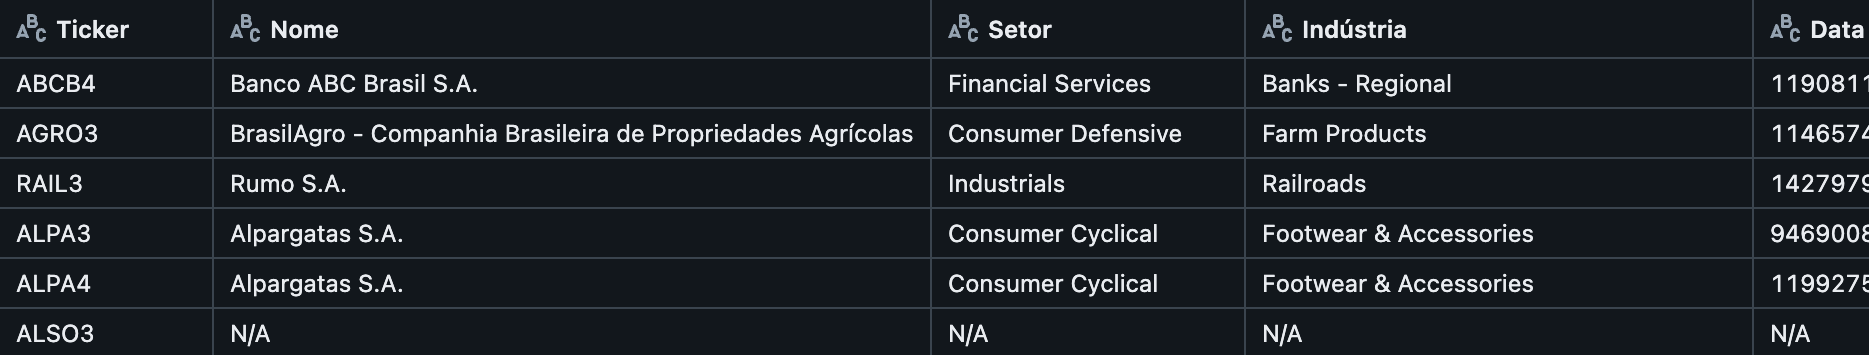

Note que temos 2 problemas que precisam ser ajustados nessa tabela, existe uma coluna com informações N/A, isso é devido a base de dados utilizado pela yfinance está incompleto, algumas ações não constam na sua base. Logo temos duas opções, encontrar uma base para suplementar essas ações ou descartar estes elementos. Além disso o campo data está em milisegundos, algo que precisa ser tratado para que a base fique com seus campos padronizados.

Para o primeiro caso, foi constatado que das 750 ações na bolsa, 222 estavam sem dados, representando 29,6 do total. No entanto, decidi que não seria necessário suplementar esses dados, pois as 100 maiores ações da bolsa, que são as mais relevantes e influentes, estavam com informações completas. Além disso, grande parte da ações com dados incompletos são ações que foram deslistadas e não mas fazem parte da Bolsa de Valores Brasileira. Logo, essas ações principais são suficientes para formar uma base sólida para nossas análises.

Restando somente a necessidade de ajustar a formatação da data. Para fazer essa transformação dentro do script para carga na plataforma databricks vou incluir uma etapa que transforma essa data em milisegundos para DD-MM-YYYY.

Para carregar os dados nas tabelas *dim_tempo* e *fato_negociacao_acao*, foi desenvolvido um script que é executado por uma *pipeline* no databricks. Este script realiza as seguintes etapas:

1. Prepara os Dados: Utilizando a data passada e o csv carregado, o script prepara os dados necessários para inserir nas tabelas dim_tempo e fato_negociacao_acao.
3. Carregamento na Tabela dim_tempo: A tabela dim_tempo é populada com a data atual e outras informações de tempo relevantes.
4. Carregamento na Tabela fato_negociacao_acao: A tabela fato_negociacao_acao é preenchida com dados de ações, associando cada entrada com a data atual carregada na dim_tempo.


Esta pipeline é útil para o carregamento das tabelas *dim_tempo* e *fato_negociacao_acao*, facilitando consultas e análises baseadas na data corrente. Não foi possivel fazer um processo de ETL (Extração, Transformação e Carga) automatizado, pois os não consegui obter automaticamente os dados de emprestimos de ações. O script usado está disponivel junto com o projeto.

# Análise:

## a. Qualidade de dados


Após a criação das tabelas dimensão e fato para análise da correlação entre a taxa de alugel e o valor, foi conduzida uma análise detalhada da qualidade dos dados. Verificou-se que não havia problemas de registros duplicados, erros de formato ou outliers nos conjuntos de dados. Todos os atributos estavam completos, consistentes e formatados corretamente, garantindo assim a integridade e confiabilidade das análises estatísticas e métricas derivadas dessas tabelas.

O único problema encontrado foi a ausencia de dados de algumas ações, em sua grande maioria ações que sairam da bolsa brasileira e pararam de ser negociadas. No entanto, isso não impacta as analises e objetivo do projeto.


## b. Solução do problema

1. Qual o valor mínimo, máximo das ações da bolsa no dia?

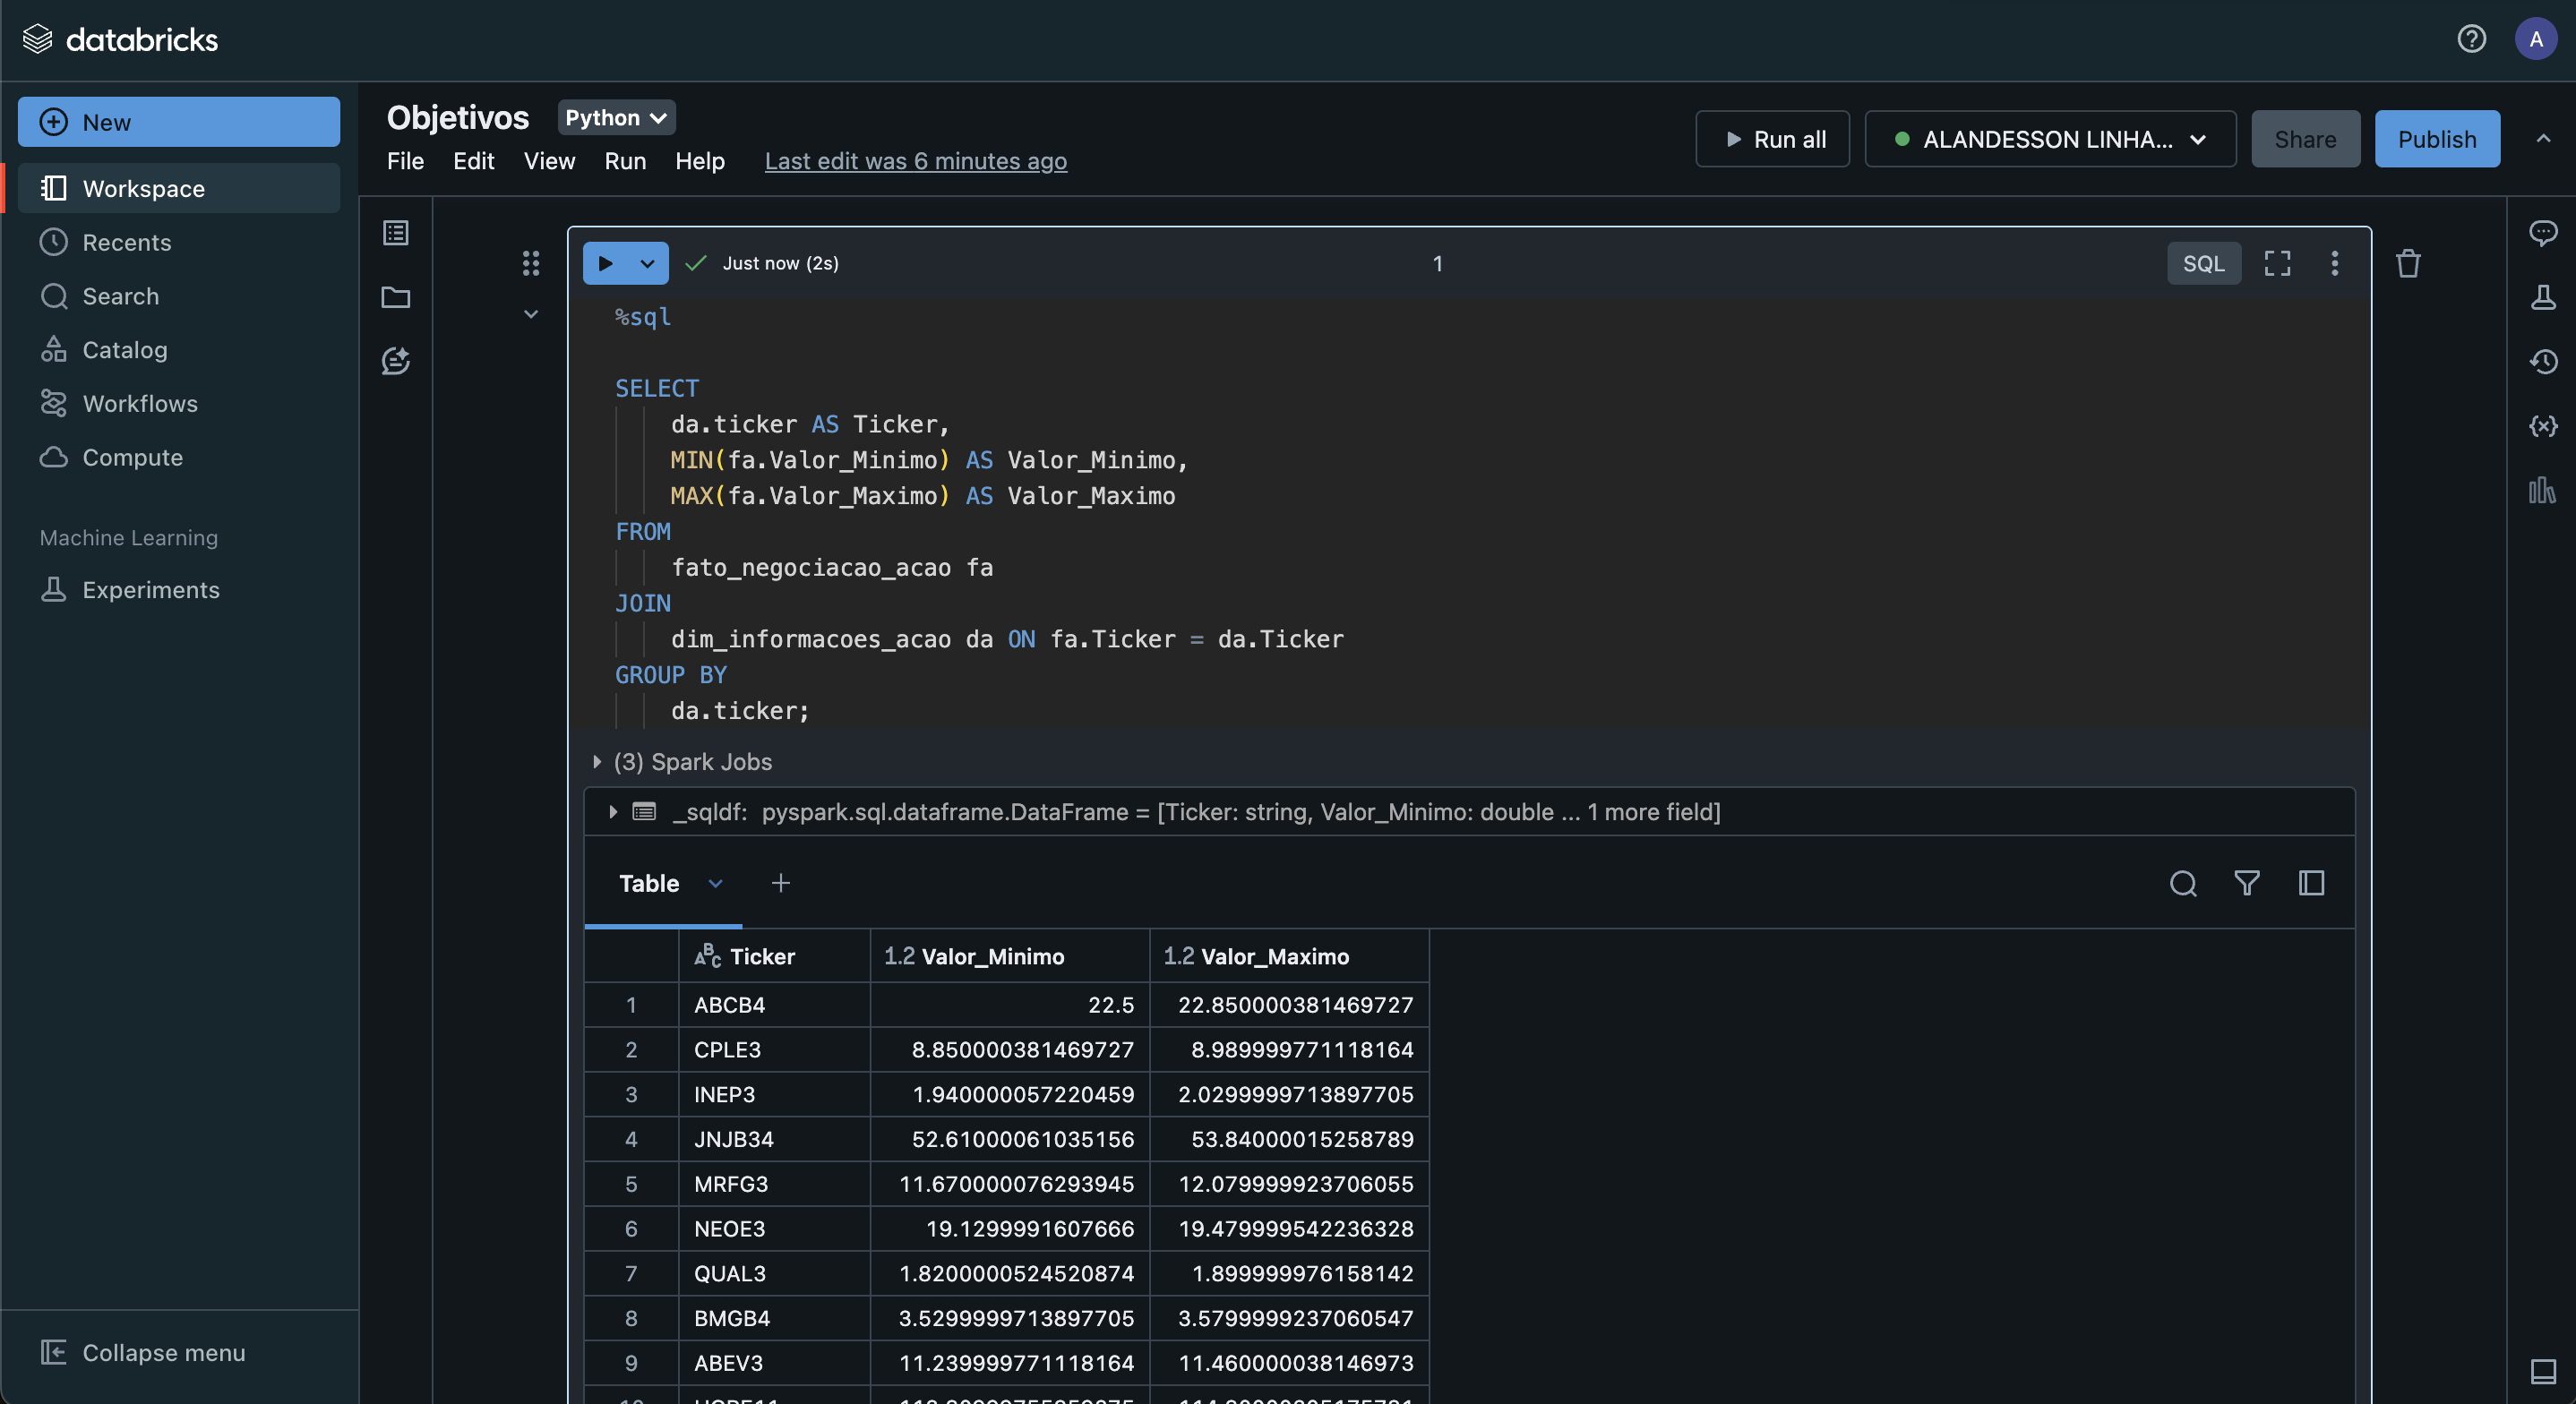


2. Qual o volume de ações vendidas?

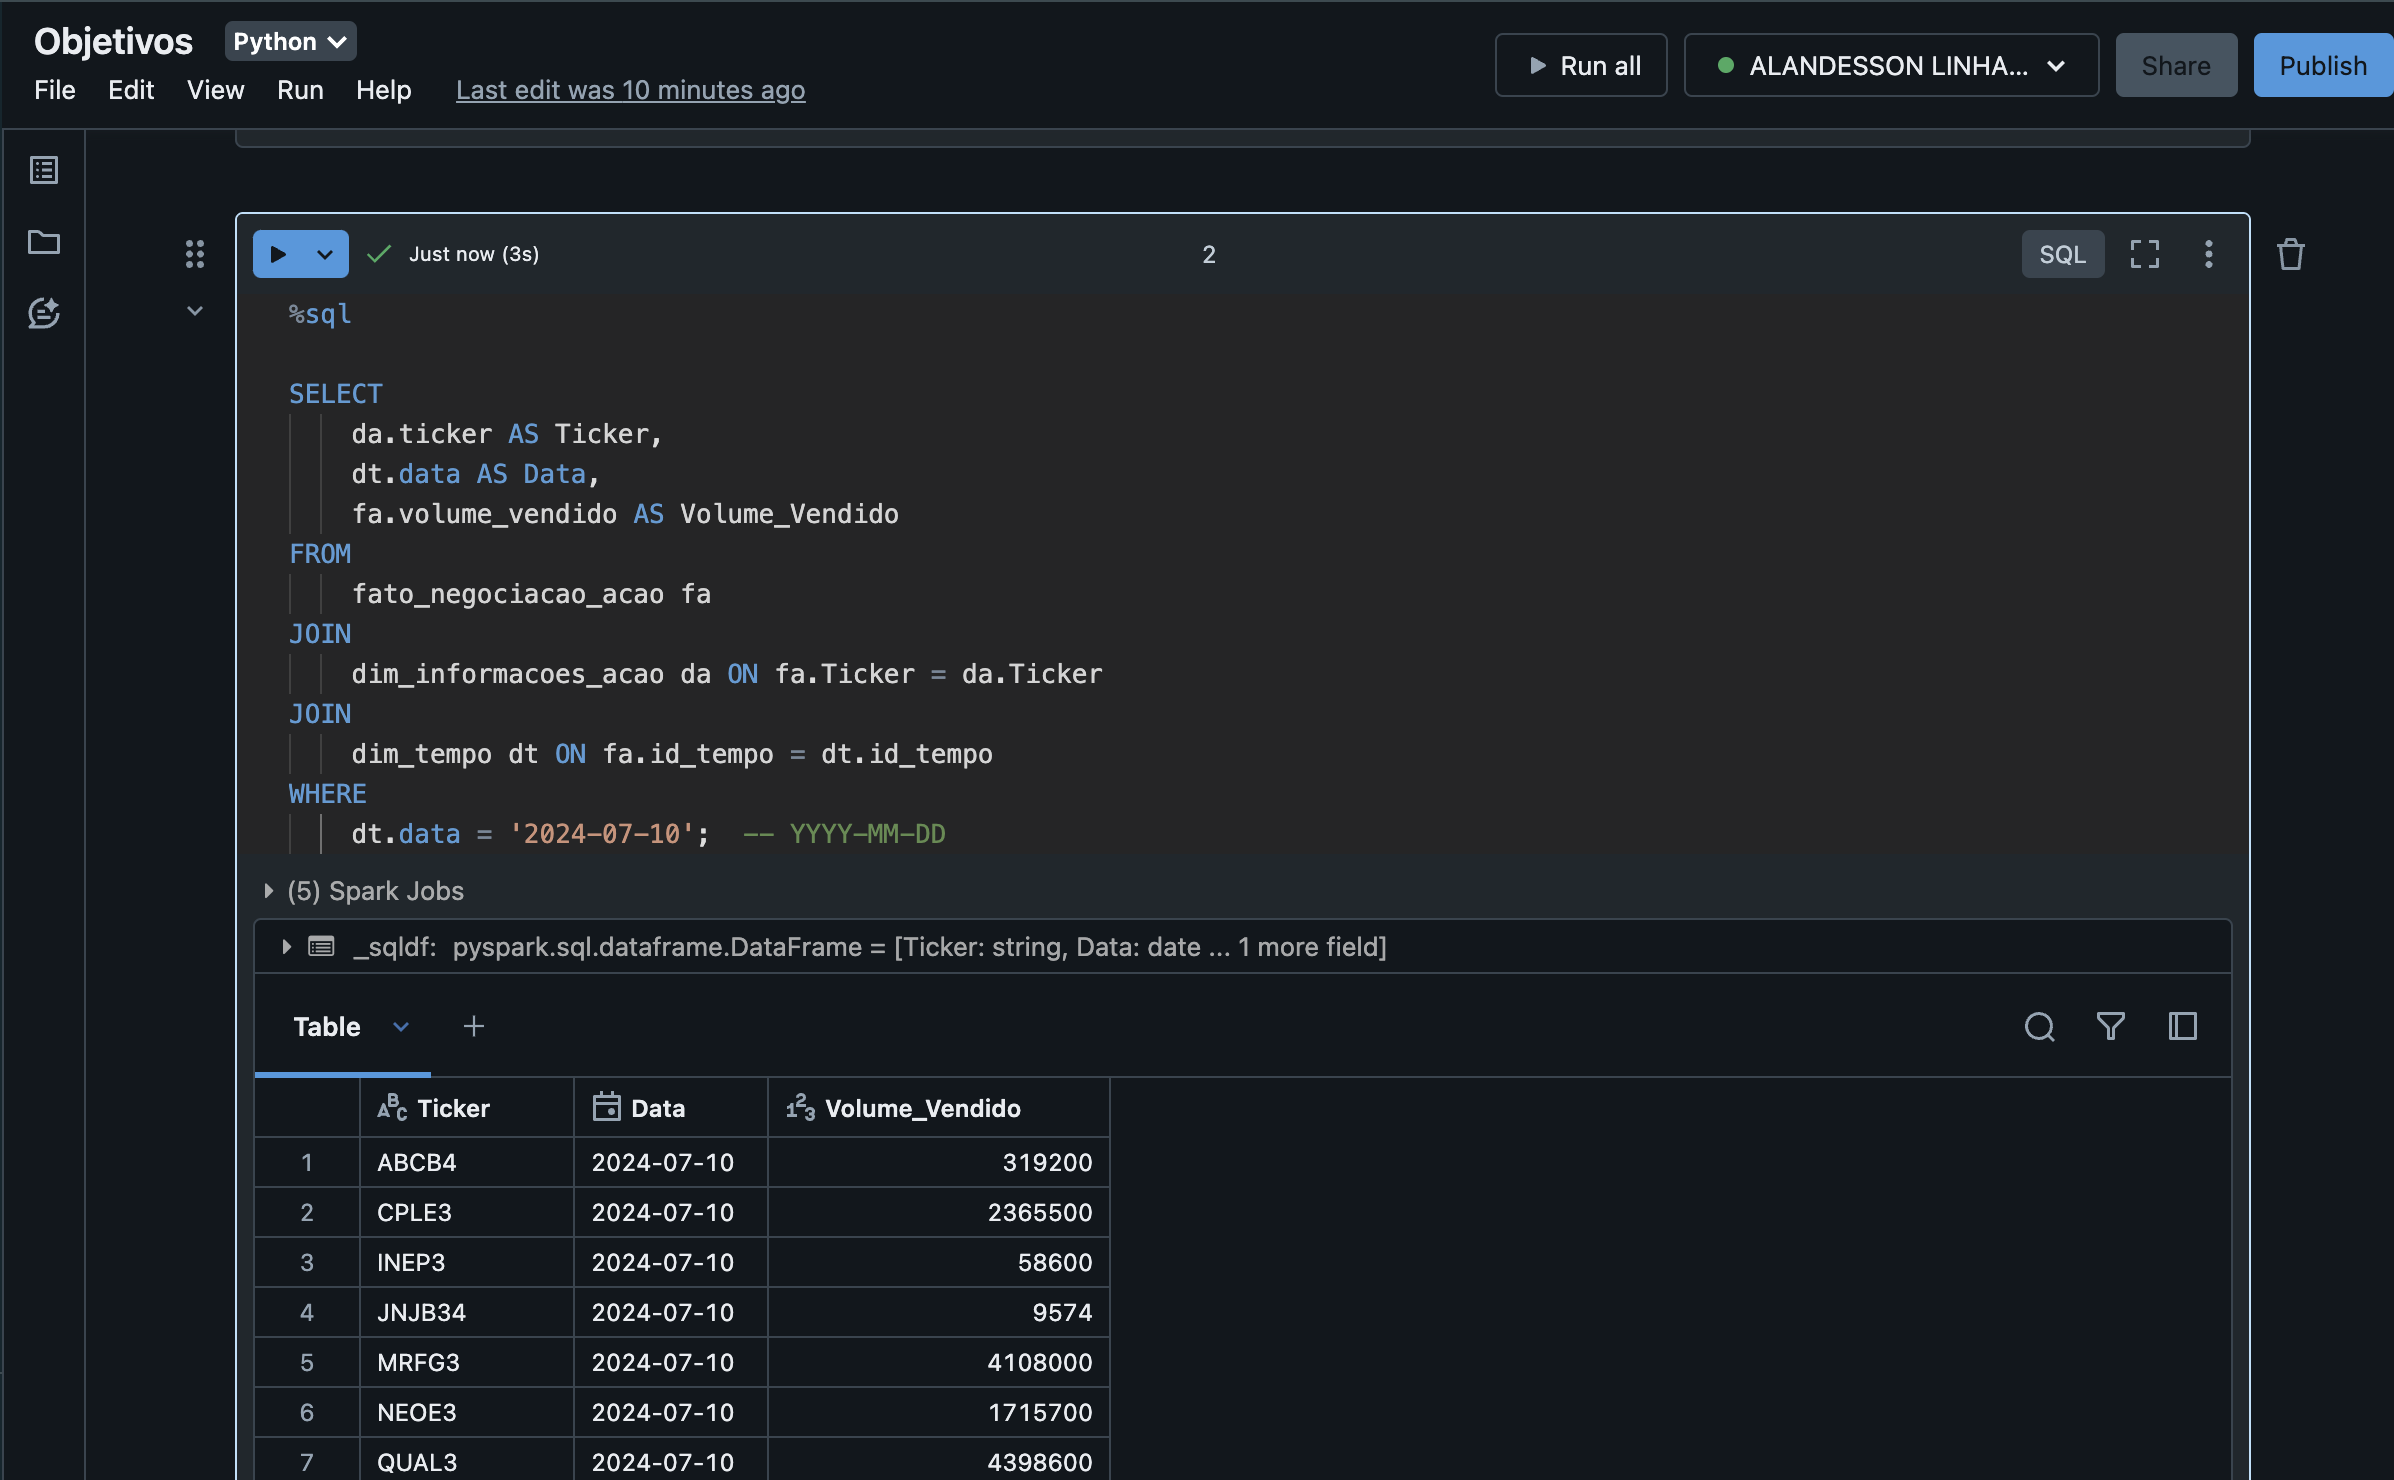

3. Qual a taxa de alugel da ação no dia?

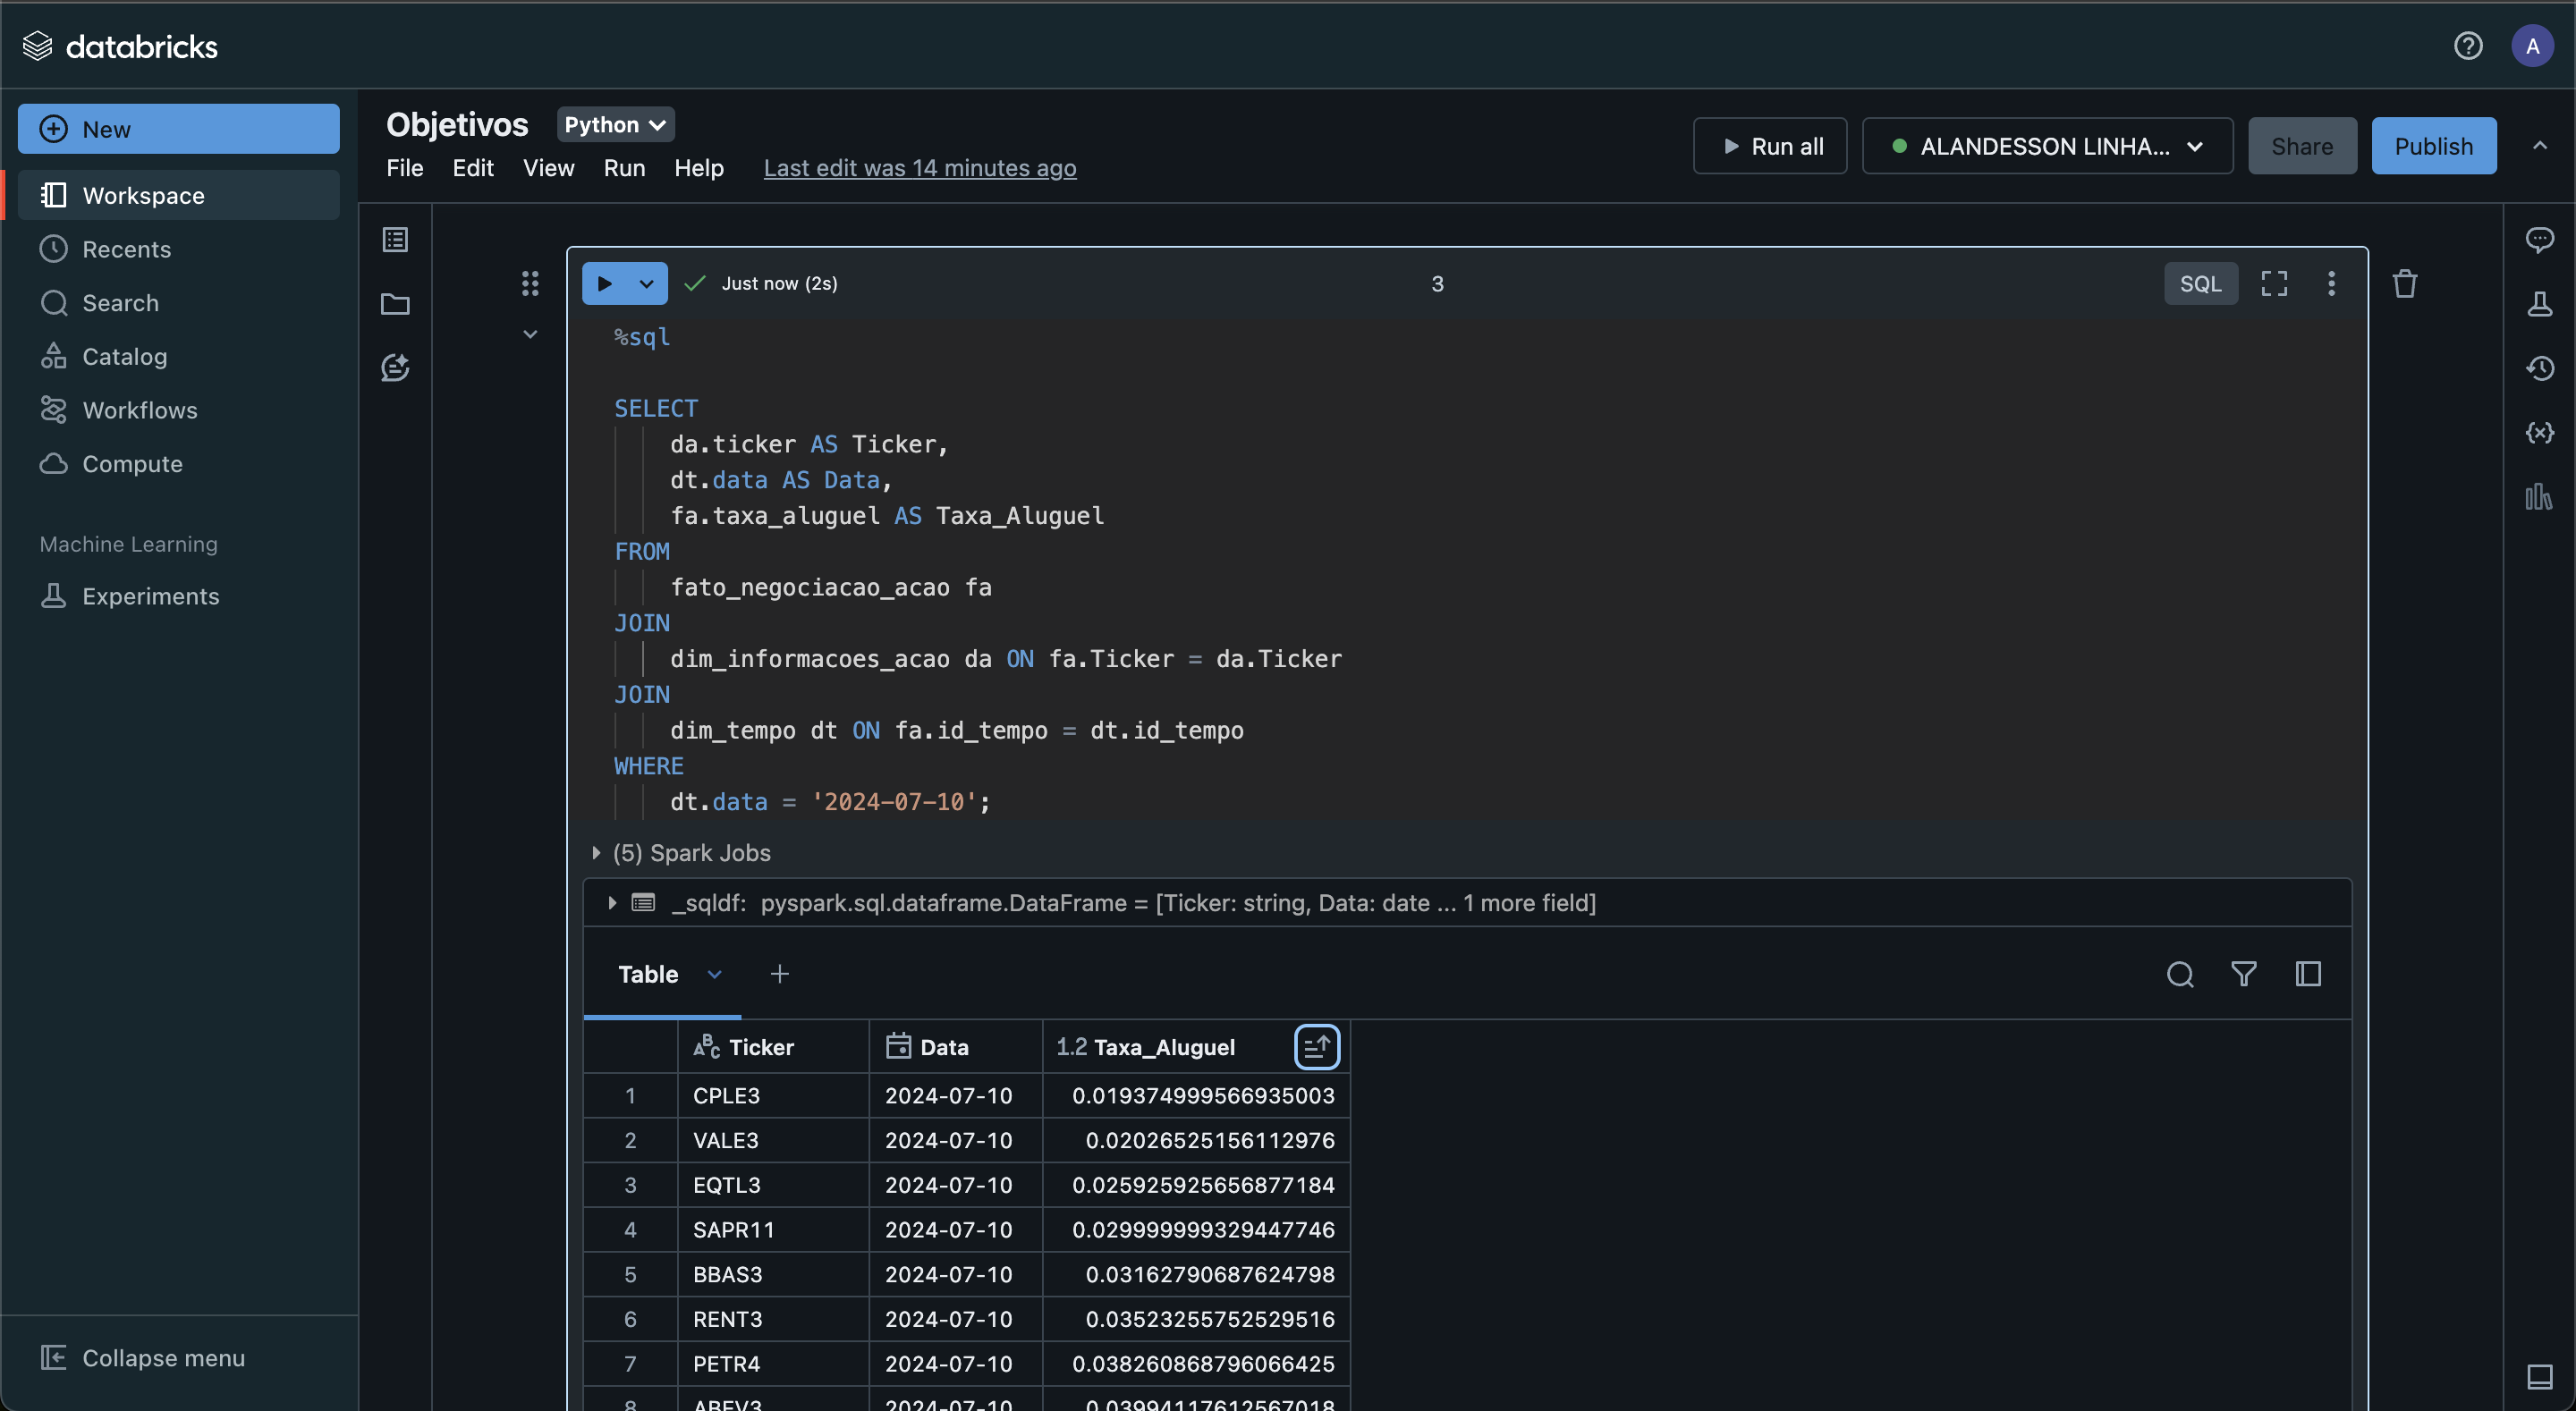



As peguntas 4 e 5 ficaram pendentes, pois como não conseguimos atingir a automação completa da pipeline, faltou coletar dados sucientes para fazer a analise de correlação.

# Autoavaliação:


Durante este projeto, enfrentei desafios que afetaram diretamente a etapa de automatização. Meu objetivo era criar um sistema para comparar automaticamente as taxas de aluguel de ações com seus valores de mercado. No entanto, ao longo do processo, ficou evidente que diversos dados da bolsa ainda não estão disponíveis de maneira acessível por meio de serviços automatizados.

Um dos principais obstáculos encontrados foi em relação aos dados de empréstimos de ativos. Não foi possível obter esses dados de forma automática, e as APIs que prometiam disponibilizá-los, como a investpy e Tiingo, não funcionaram devido a alterações nas interfaces dos sites da B3 e Fundamentus. Ferramentas que dependem de web crawlers são suscetíveis a erros e exigem ajustes frequentes, comprometendo a confiabilidade das soluções automatizadas e a qualidade dos dados.

Embora tenha progredido na automação de partes do processo de coleta de dados, reconheço que a conclusão integral do projeto exigiria um esforço ainda maior. Tentei extrair os dados utilizando Selenium para baixar o CSV com os dados de empréstimos da B3; no entanto, enfrentei dificuldades devido a elementos com IDs dinâmicos e React Router, o que dificulta sua localização e o uso de crawlers para essa tarefa.

A seguir está um exemplo de script que estava sendo desenvolvido para realizar está tarefa:


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os

# Configuração do WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
prefs = {"download.default_directory": os.path.abspath("downloads")}
options.add_experimental_option("prefs", prefs)
driver = webdriver.Chrome(options=options)

try:
    driver.get("https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/consultas/boletim-diario/boletim-diario-do-mercado/")

    wait = WebDriverWait(driver, 20)
    clearing_button = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "CLEARING")))
    clearing_button.click()

    dropdown = wait.until(EC.presence_of_element_located((By.ID, "ddlTabela")))
    select = Select(dropdown)
    select.select_by_visible_text("Empréstimos de Ativos – Negócios")

    more_button = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "b3__ico--more_vert")))
    more_button.click()

    export_csv_link = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "Exportar CSV")))
    export_csv_link.click()

    time.sleep(10)

finally:
    driver.quit()

# Evidências:

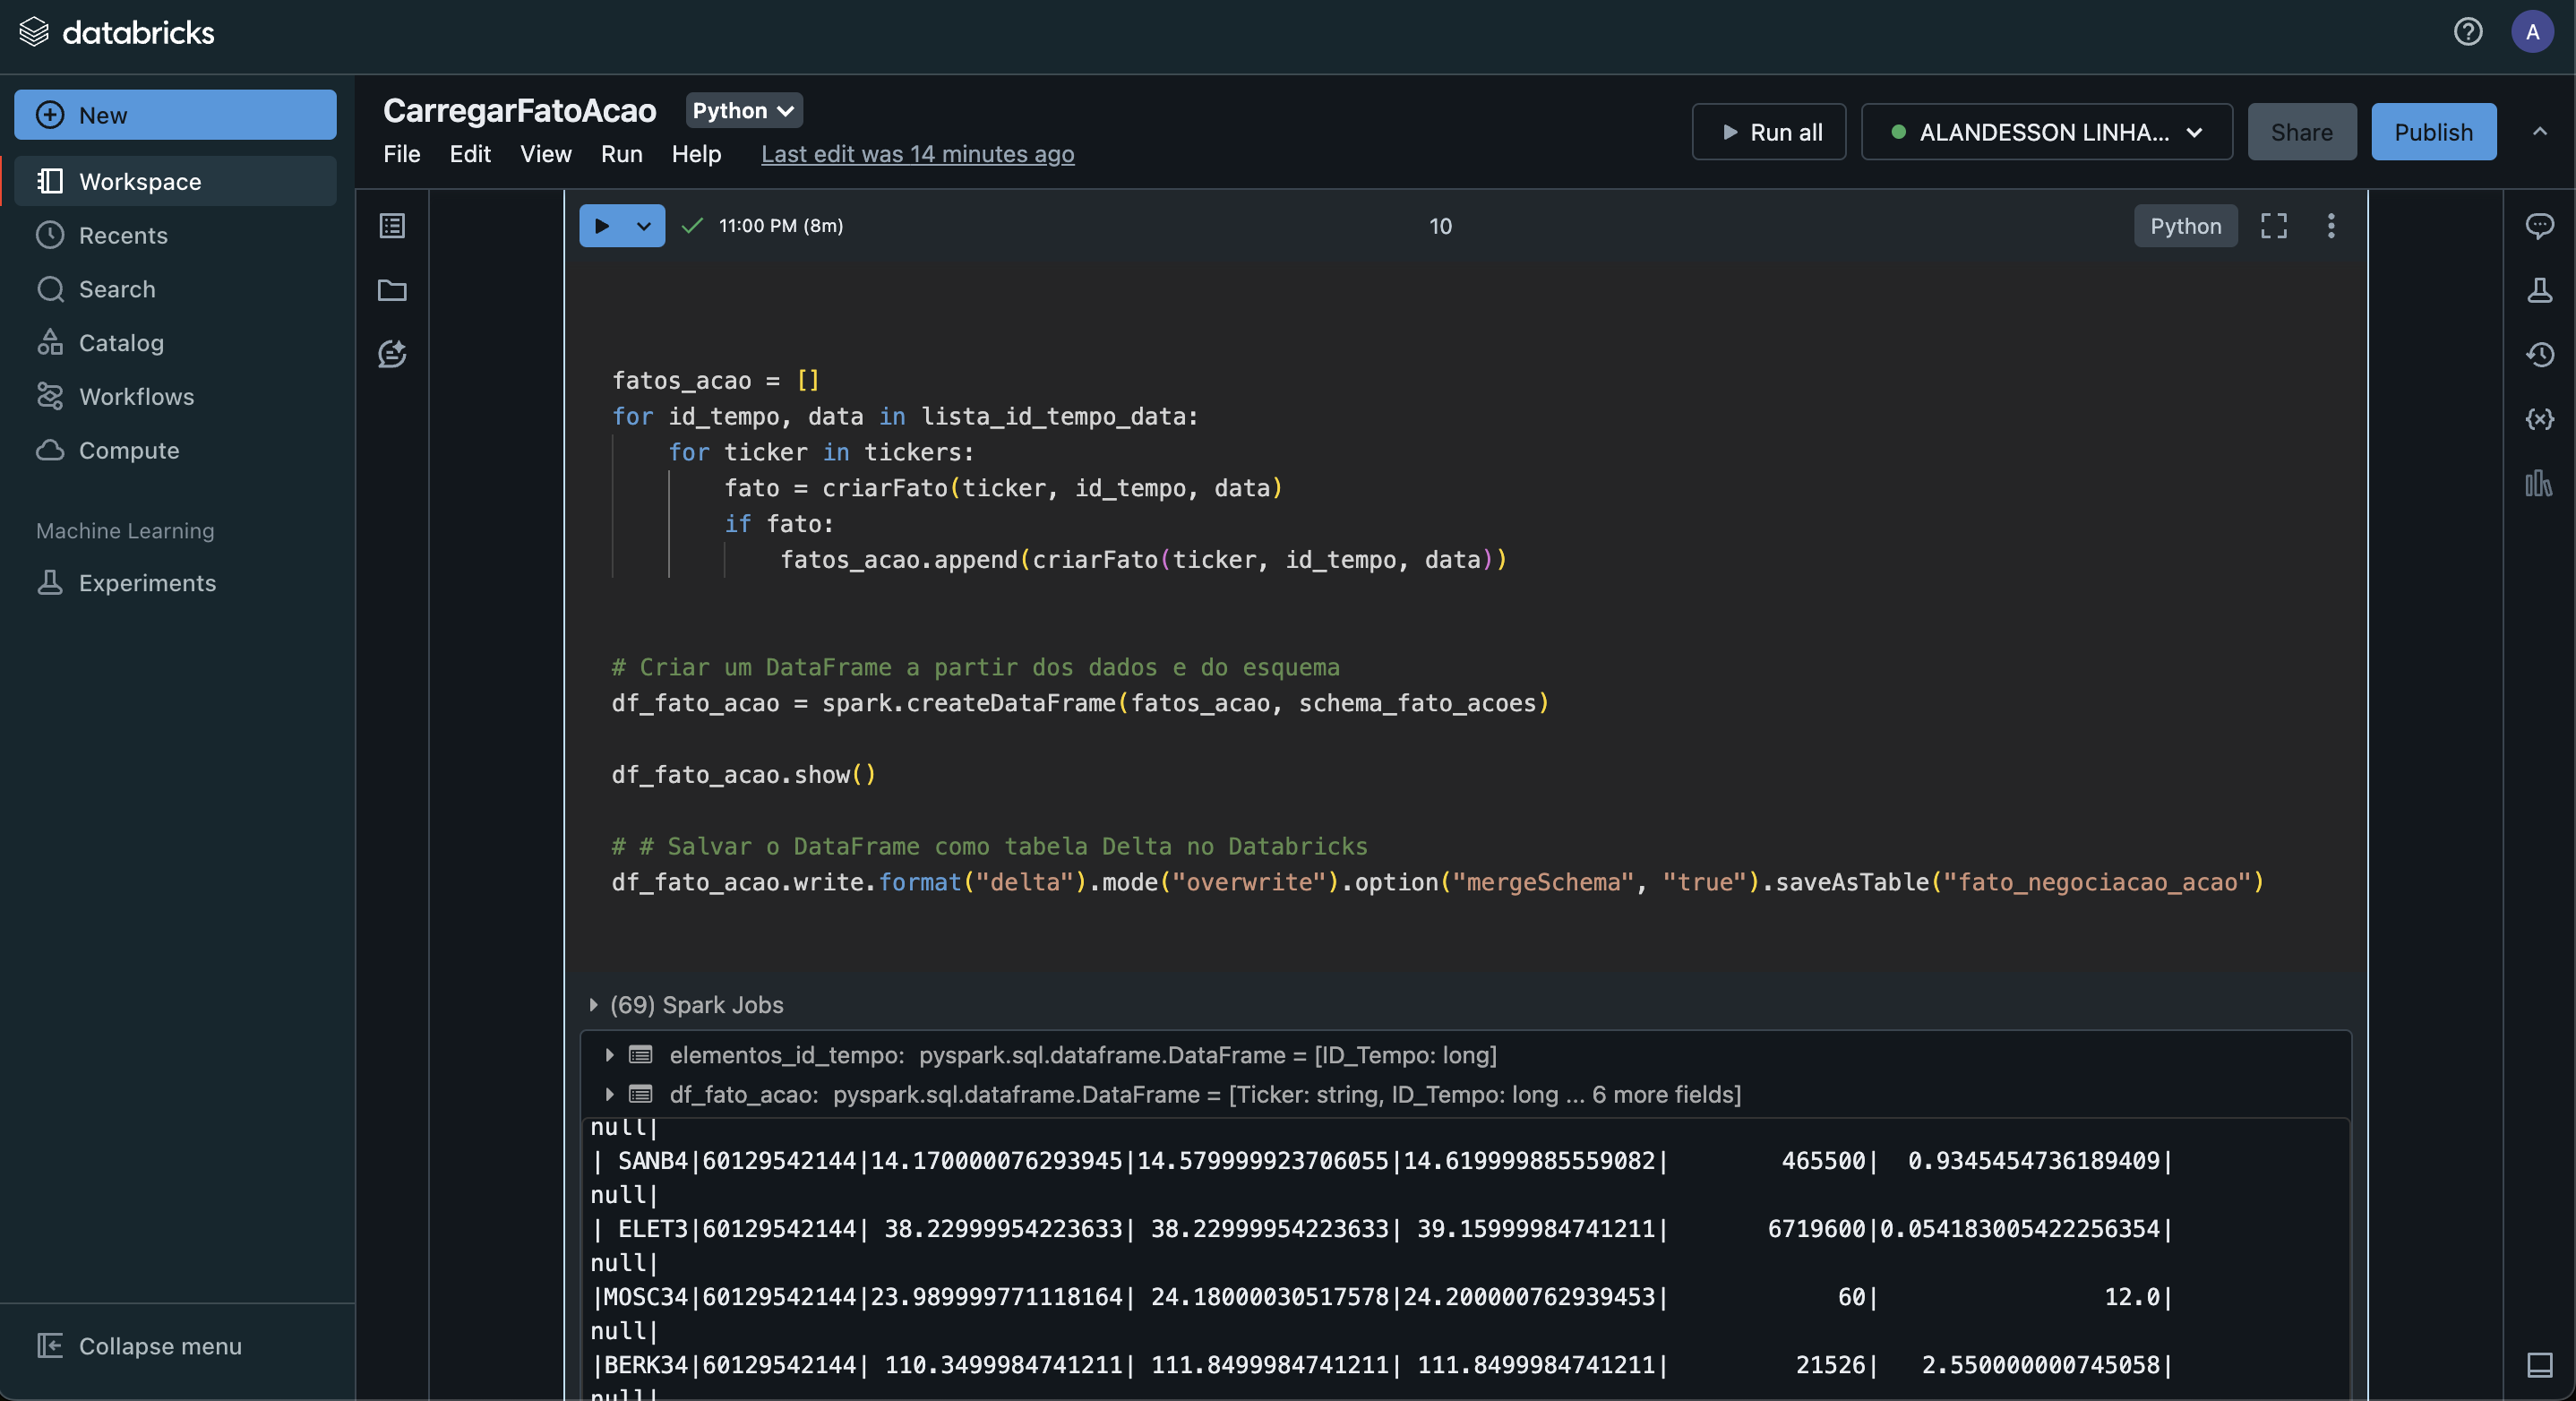

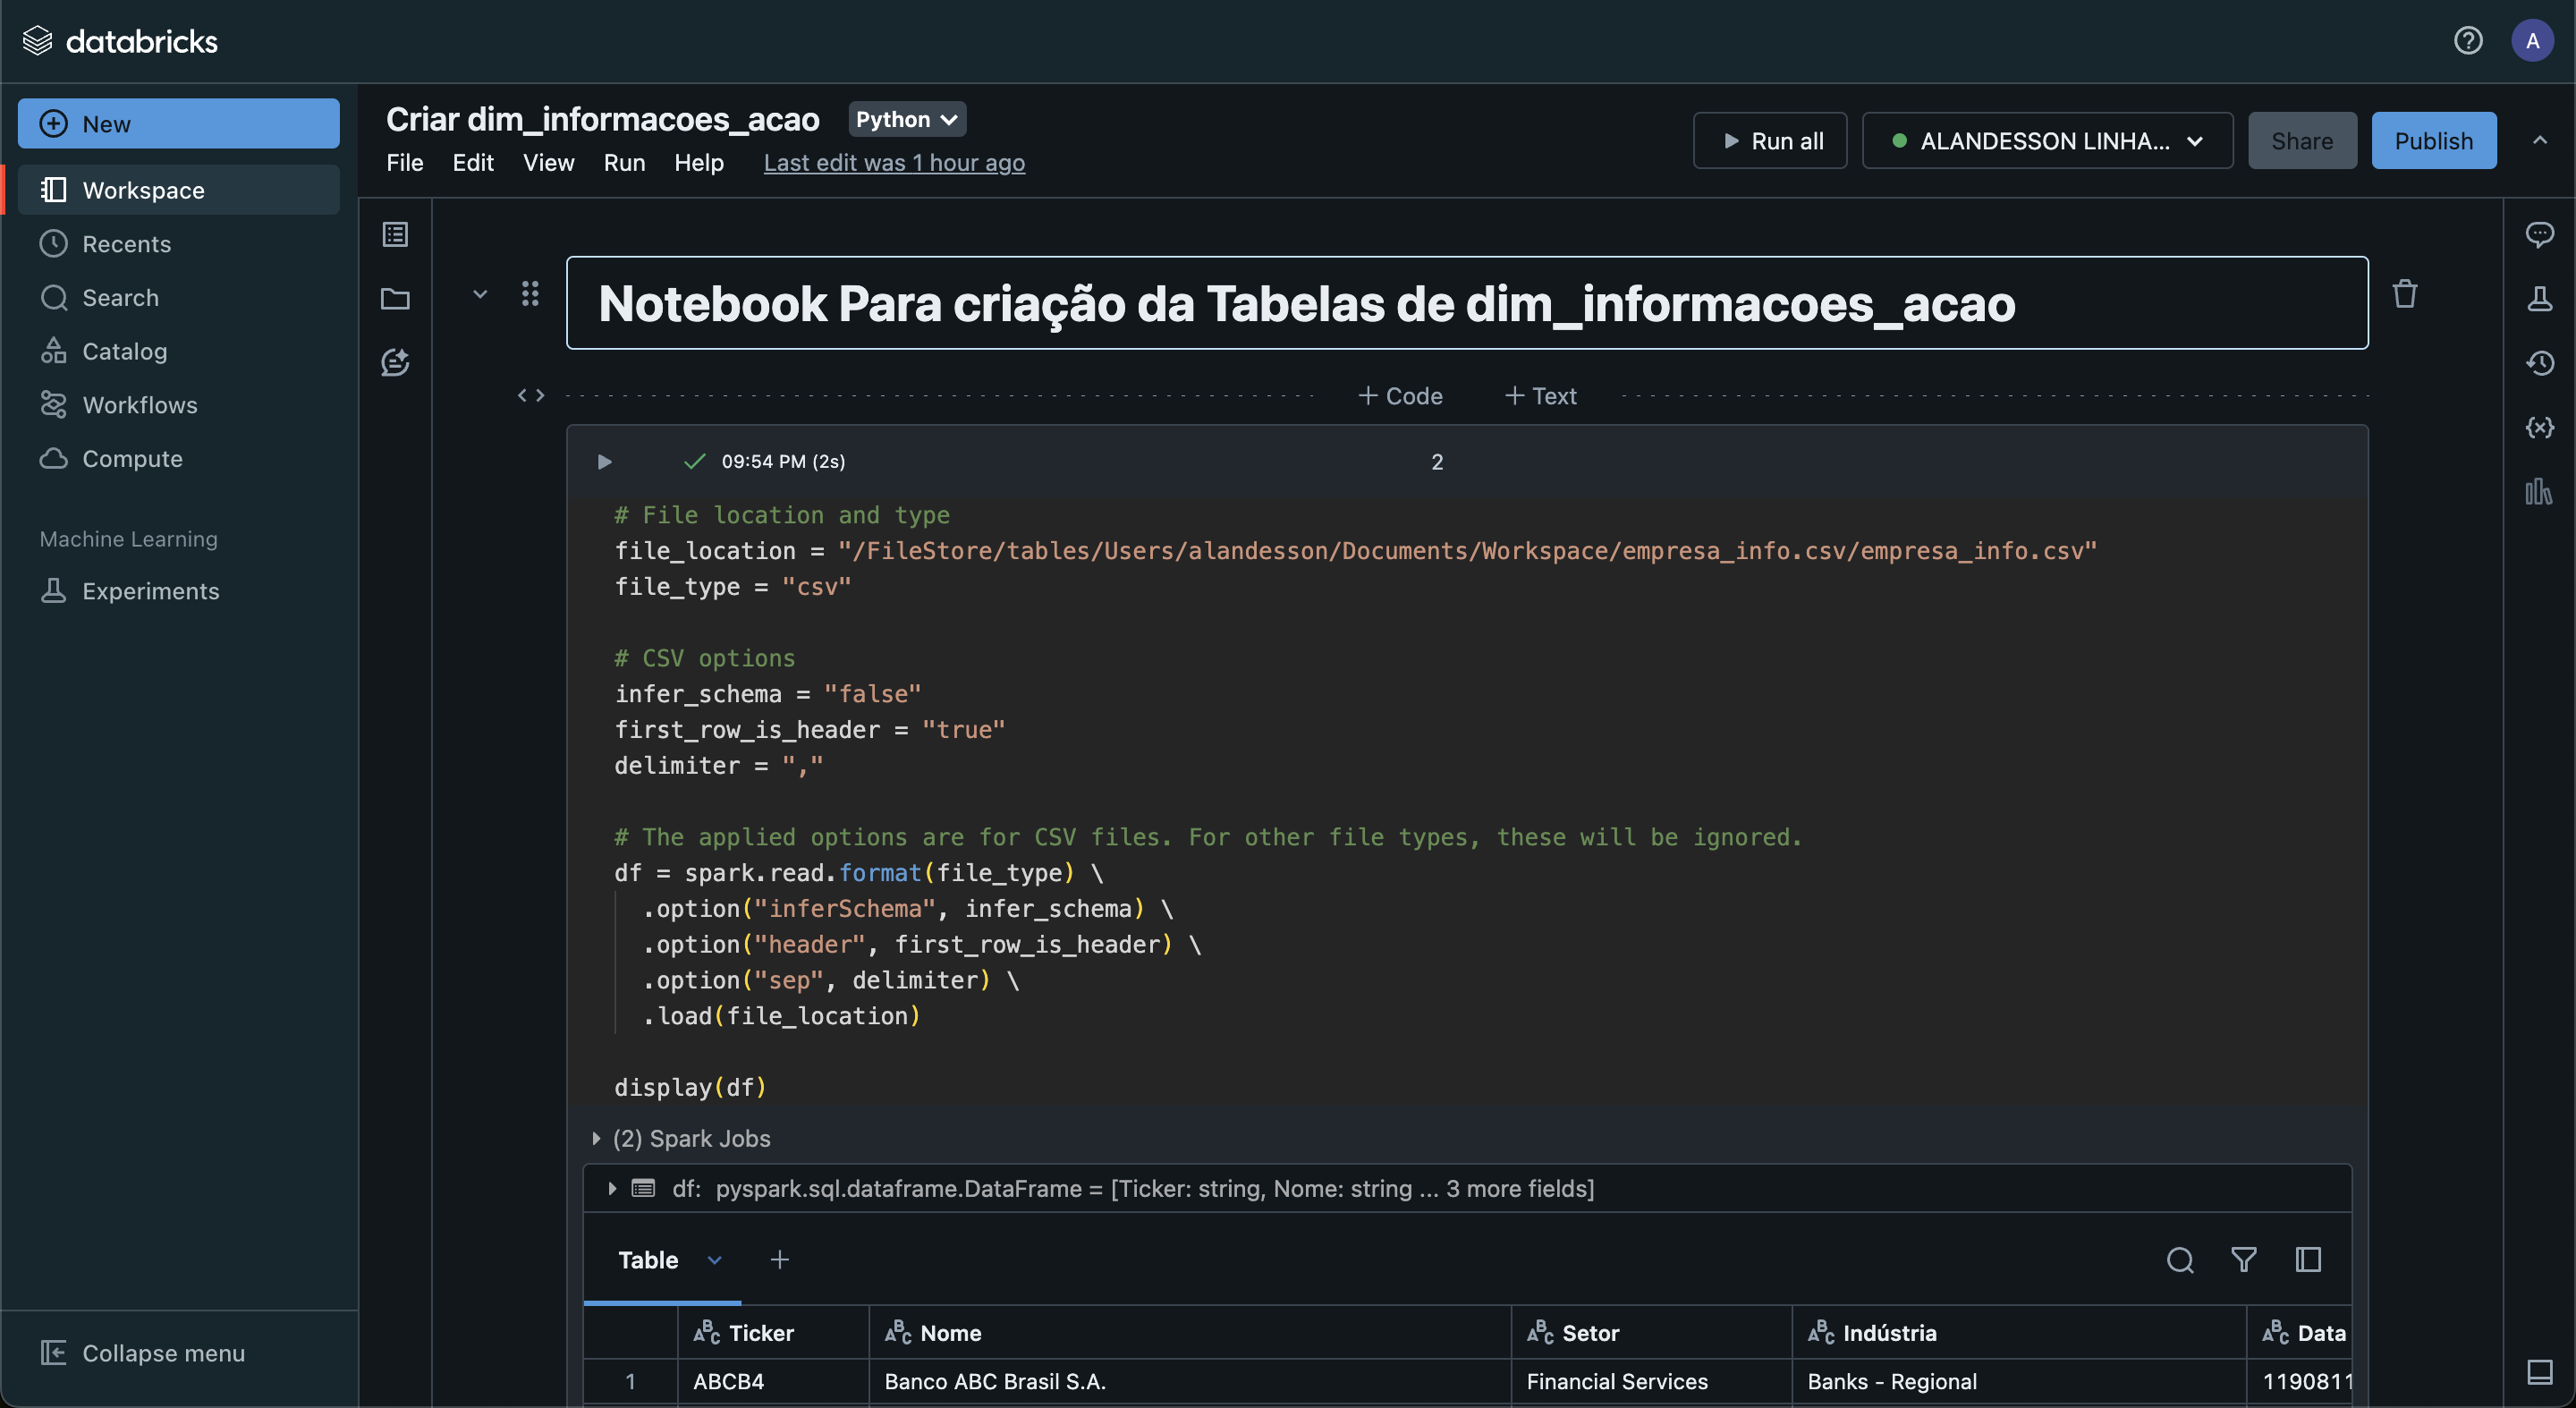

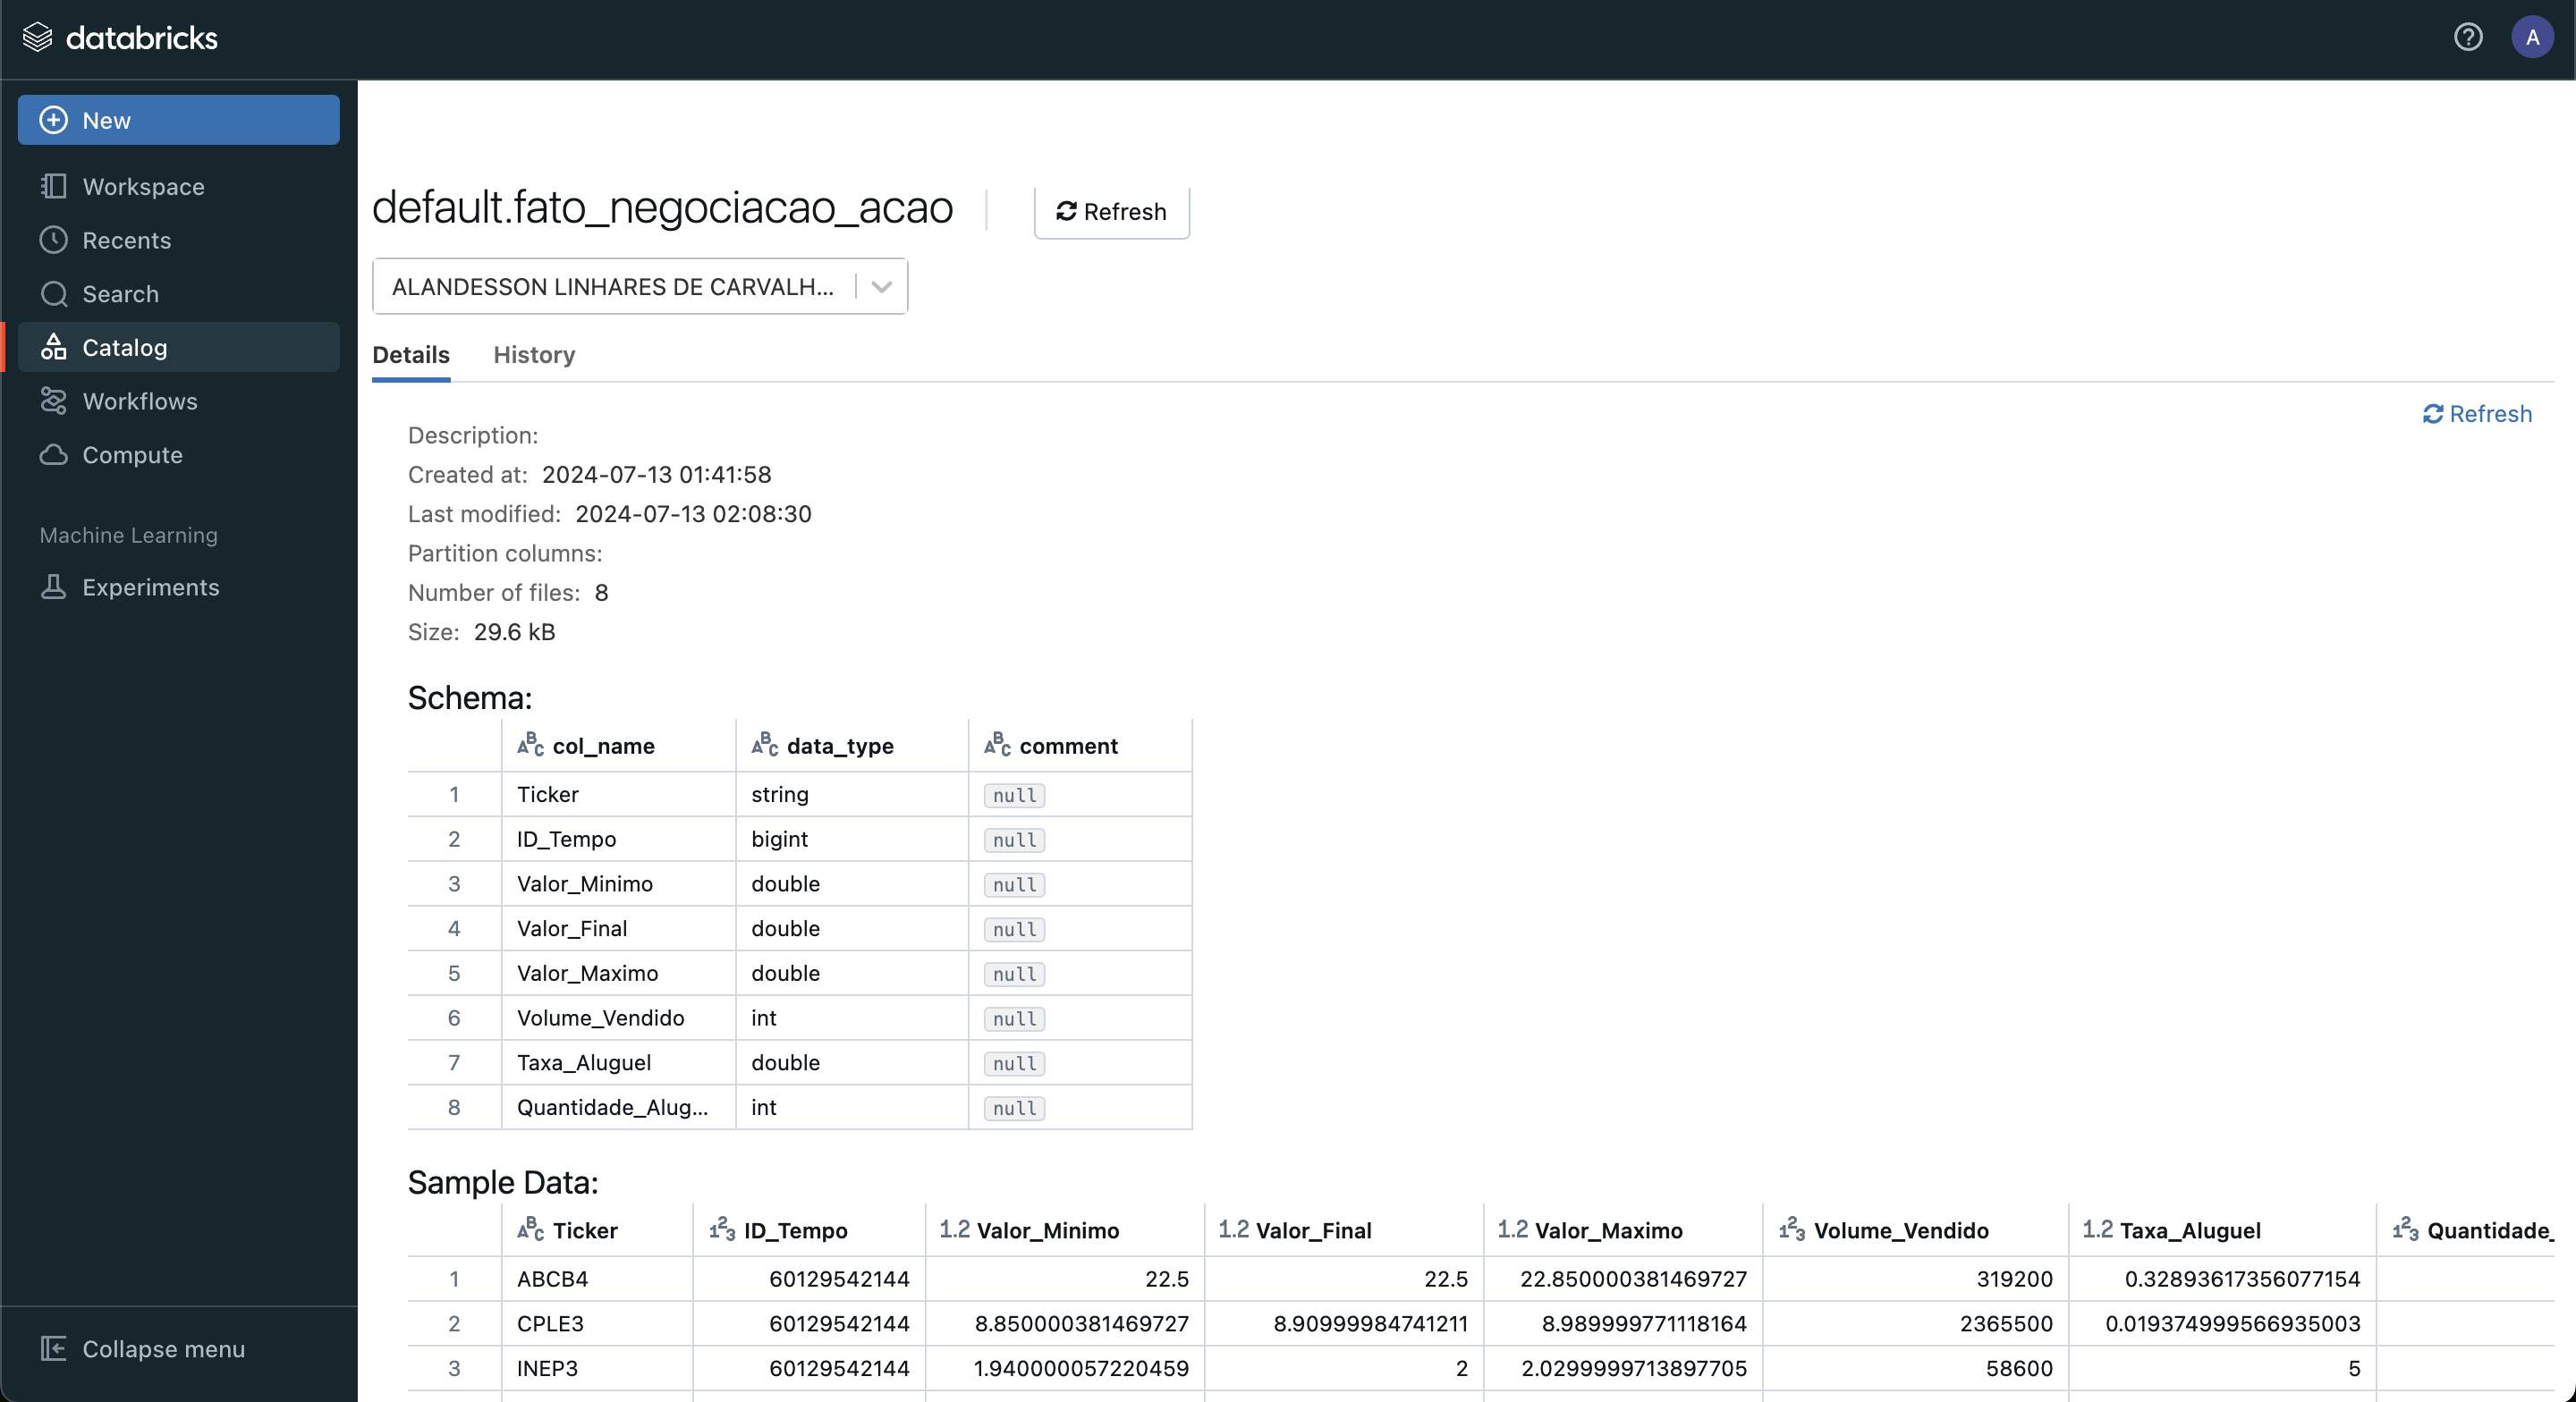

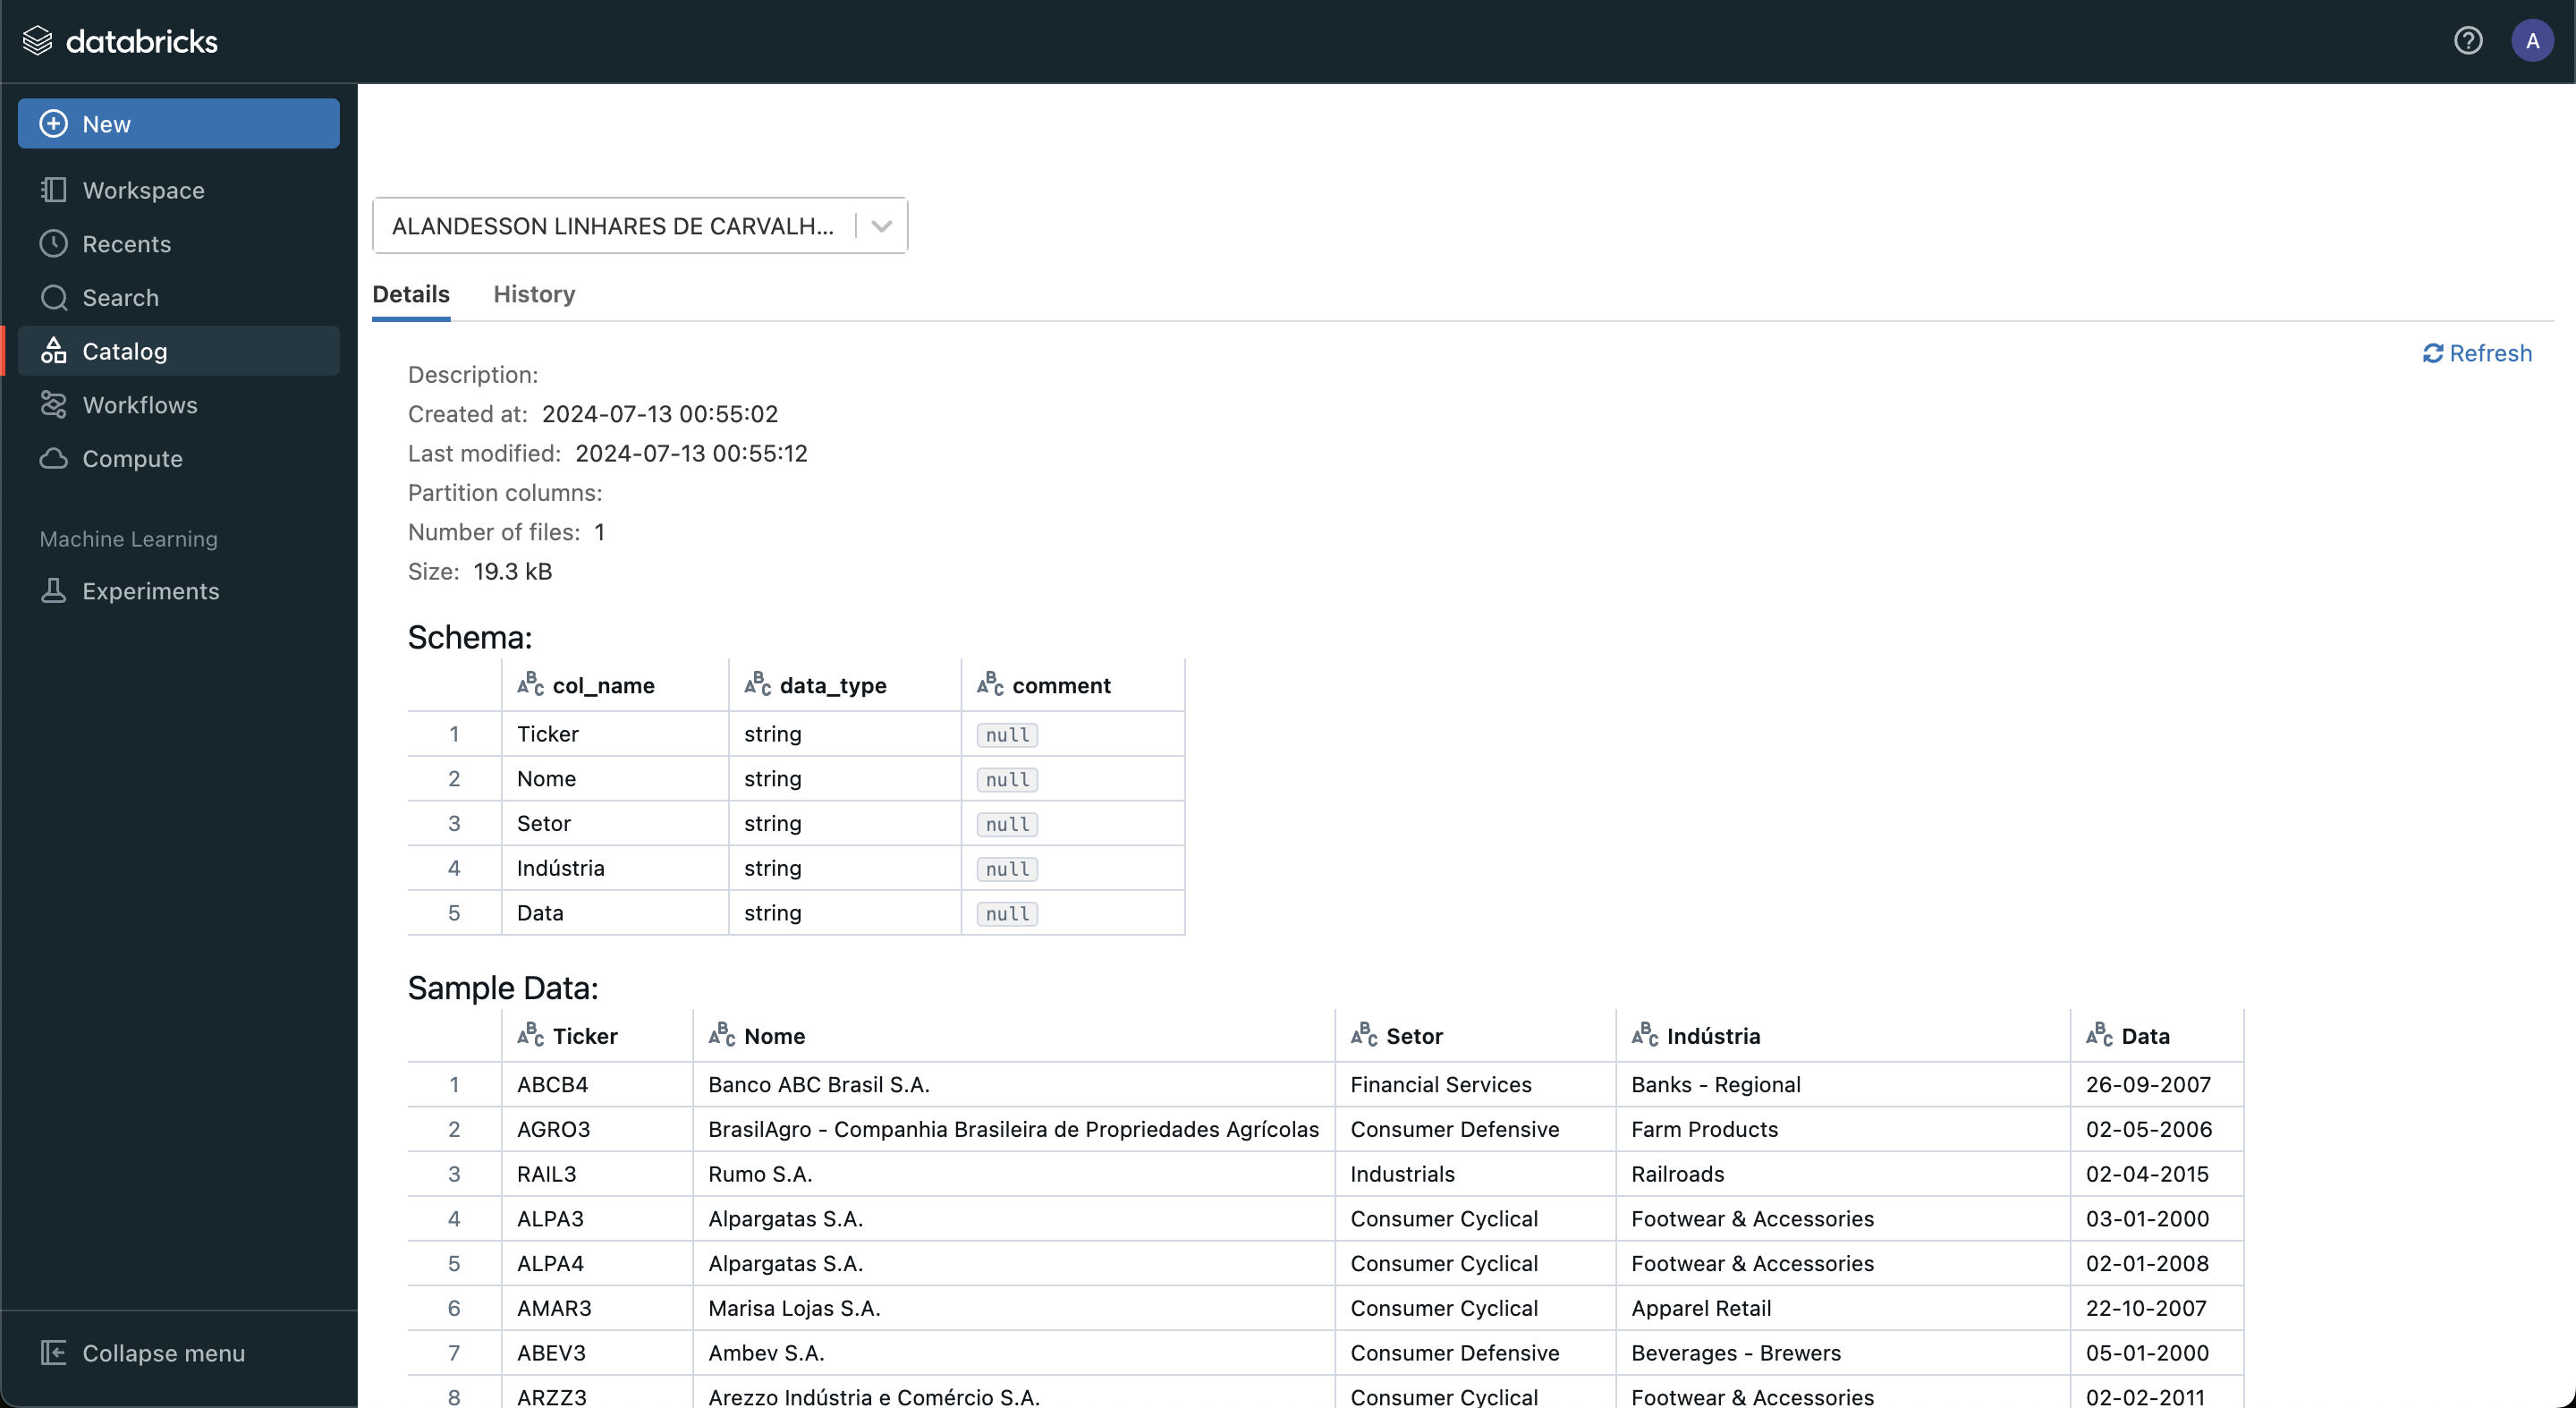

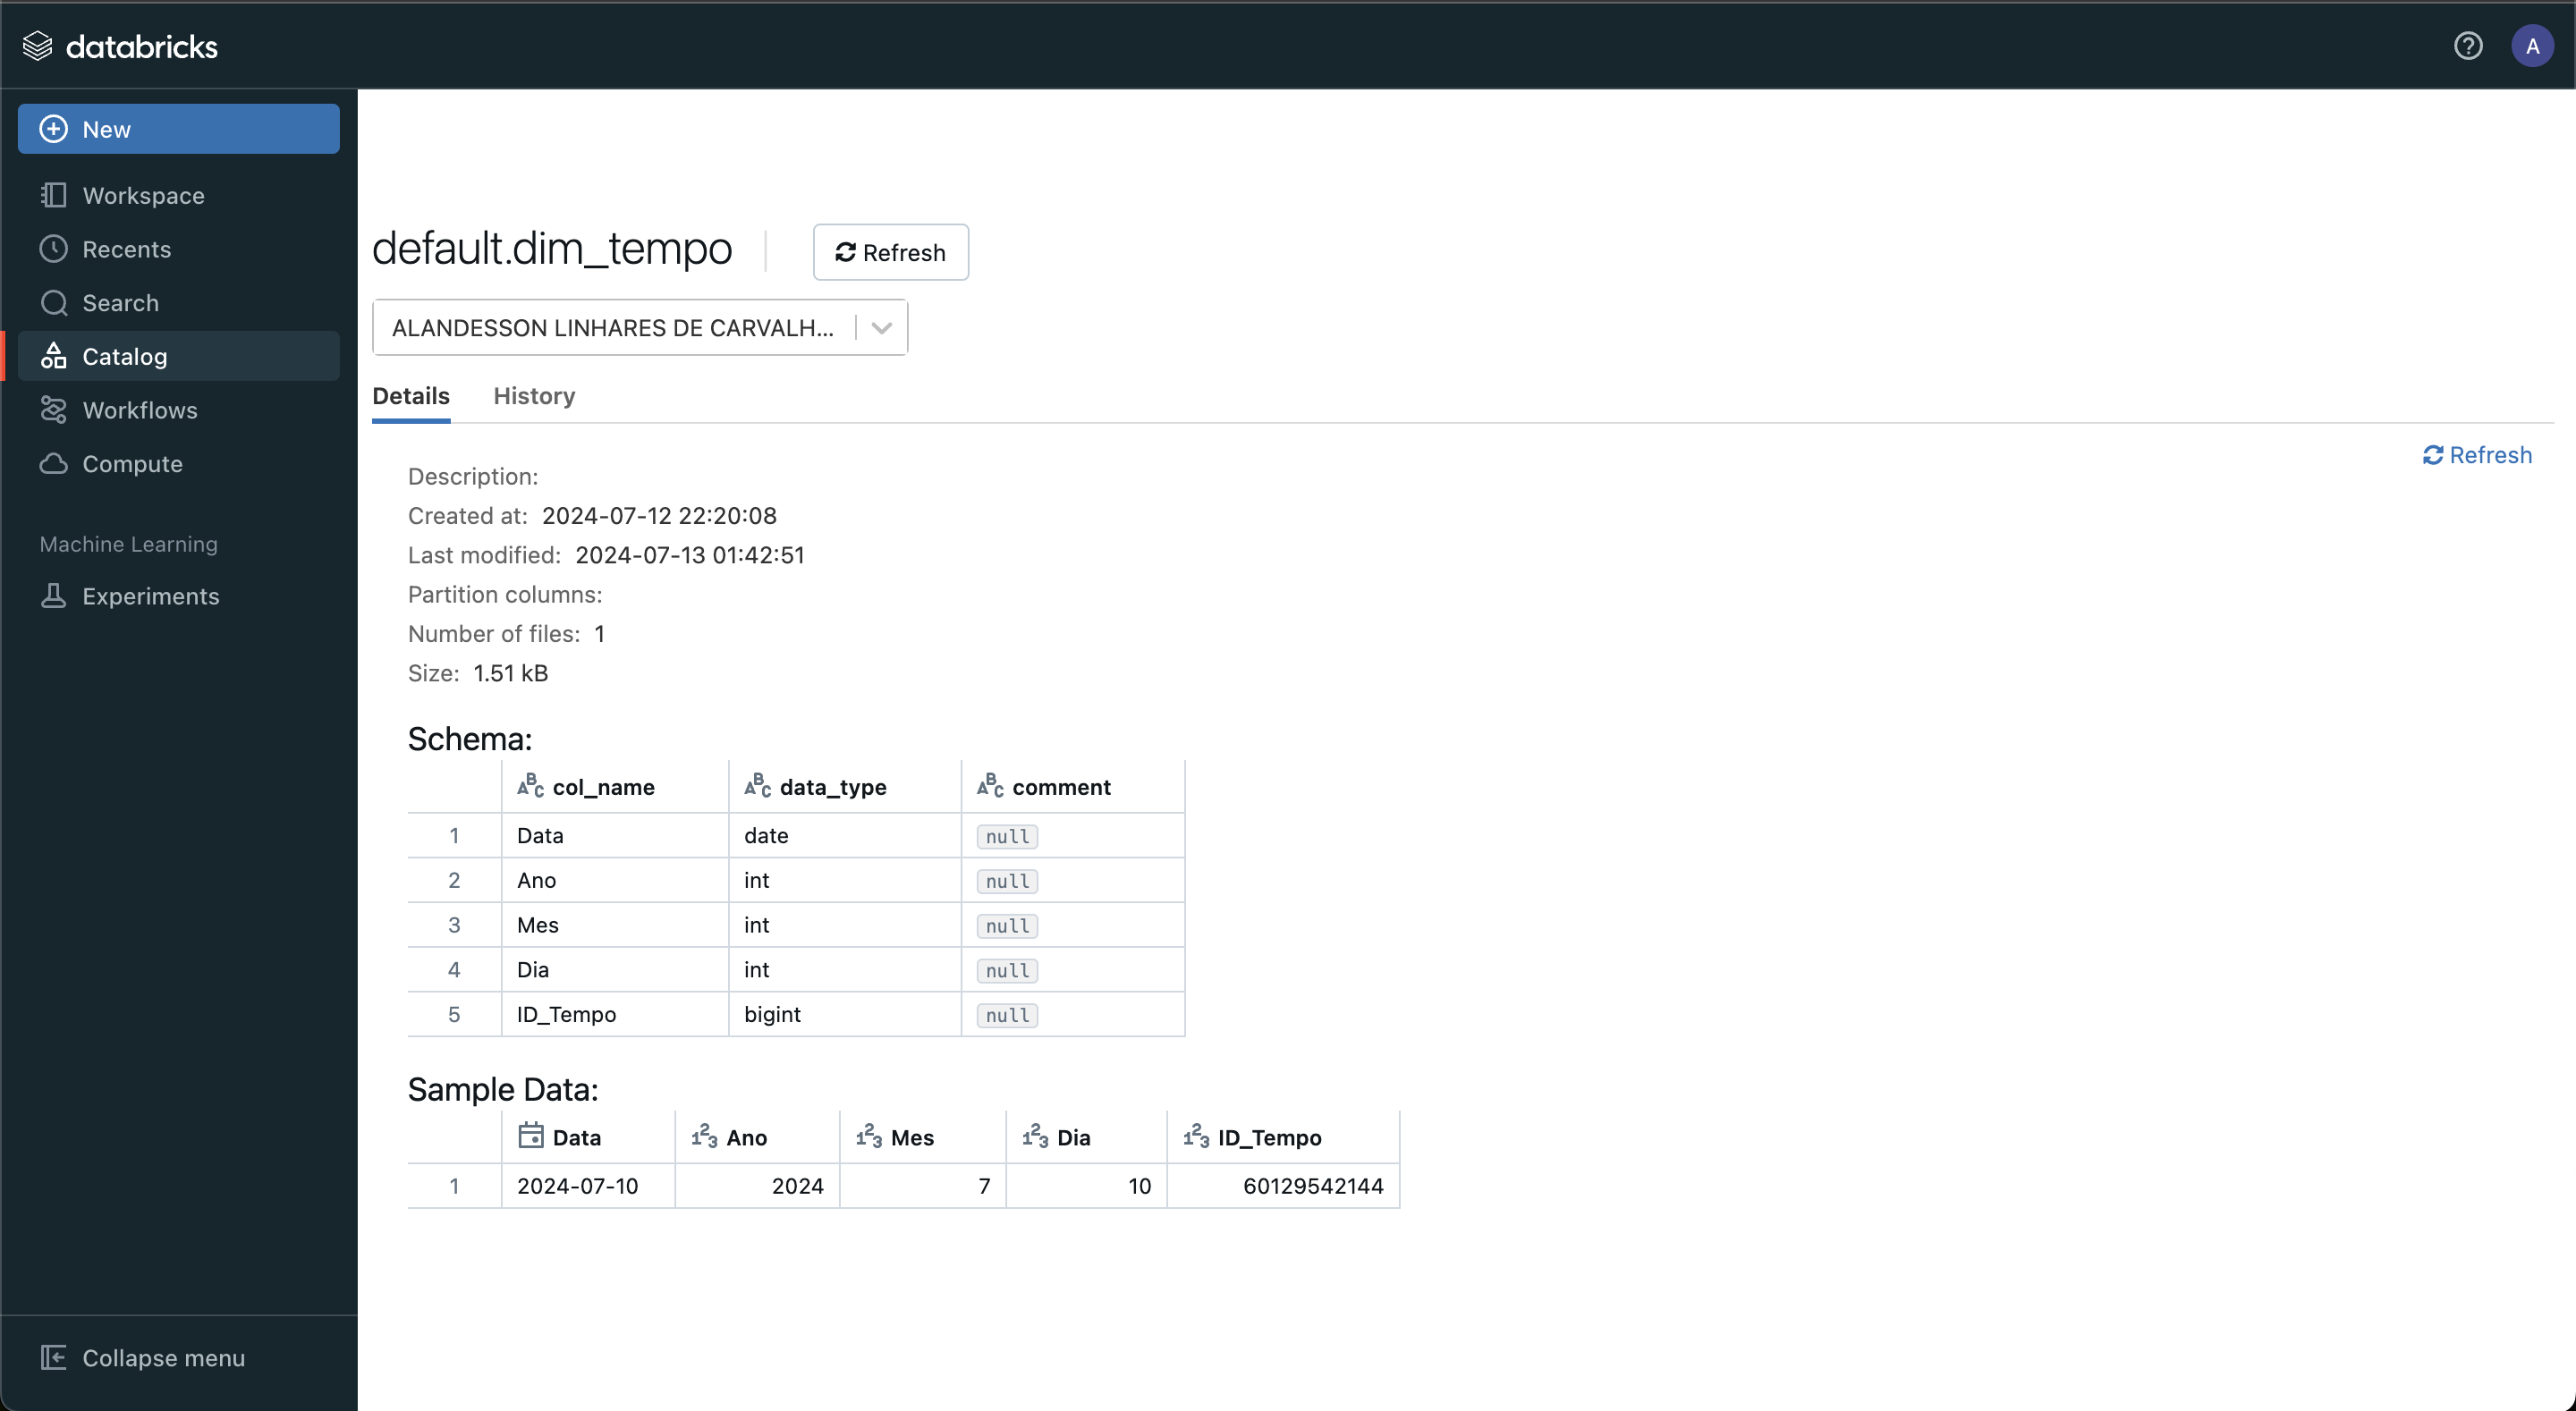